# Project Outline
- We want to produce a model to predict whether or not a startup ends up Successful depending on its existing metrics like number of funding rounds, months before its first funding, etc
    - Startup Success is defined as a startup getting acquired, ipo, or operating with a certain amount of funding (specific amount of funding is determined with the data later)

In [182]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


EDA : 

1) Analysing Status 

1.1 Numerical variables against status 

1.2 Categorial against status 

1.3 Geographical Analysis 

2) Analysing Funding 

2.1 Numerical variables against funding 

2.2 Categorial variables against funding

2.3 Geographical Analysis 

In [183]:
startup = pd.read_csv("startup.csv")
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42,-71,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1,0,acquired
1,204,CA,37,-122,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,5,1,acquired
2,1001,CA,33,-117,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4,1,acquired
3,738,CA,37,-122,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3,1,acquired
4,1002,CA,38,-122,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1,1,closed


In [184]:
startup.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [185]:
len(startup.columns)

49

In [186]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

###  Identifying Indicators of the Success of a Startup

Given the nature of our goal - to predict whether a startup would be a success/failure, two main features/indicators were selected from the dataset. These two variables are :
- Status 
- Funding (funding_total_usd)

## Analysing Status 

It is first integral to shortlist important factors that are useful for the prediction of the success of a startup. These comparisons between other variables and the two identied indicatord can be done in various ways, depending on whether the variables in consideration are numerical or categorical. 

### Numerical Variabes against Status

Comparing the numerical variables against status

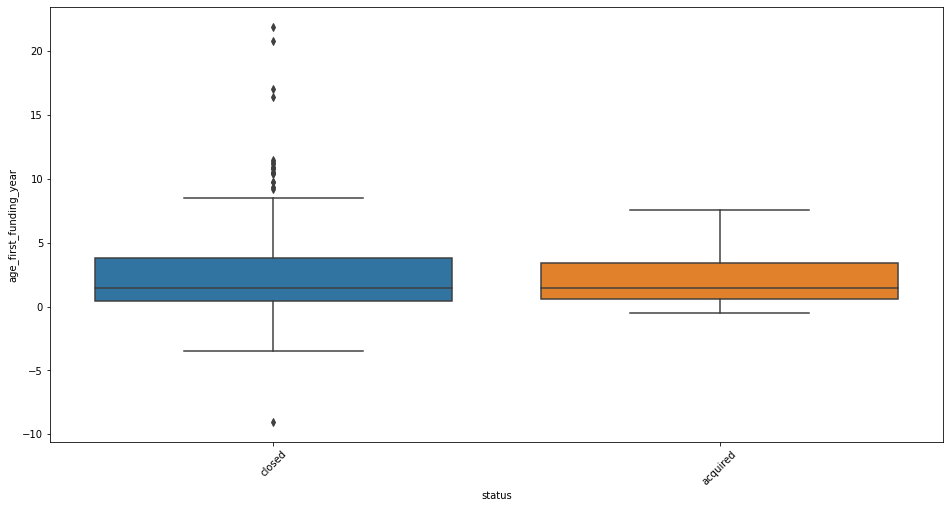

In [187]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'age_first_funding_year', x = 'status', data = startup, 
           order = startup.groupby('status')['age_first_funding_year'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

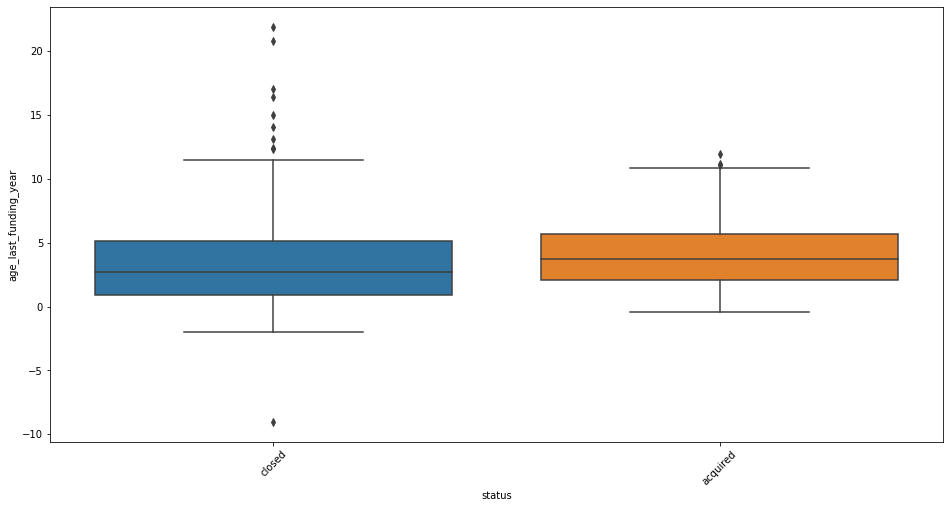

In [188]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'age_last_funding_year', x = 'status', data = startup, 
           order = startup.groupby('status')['age_last_funding_year'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

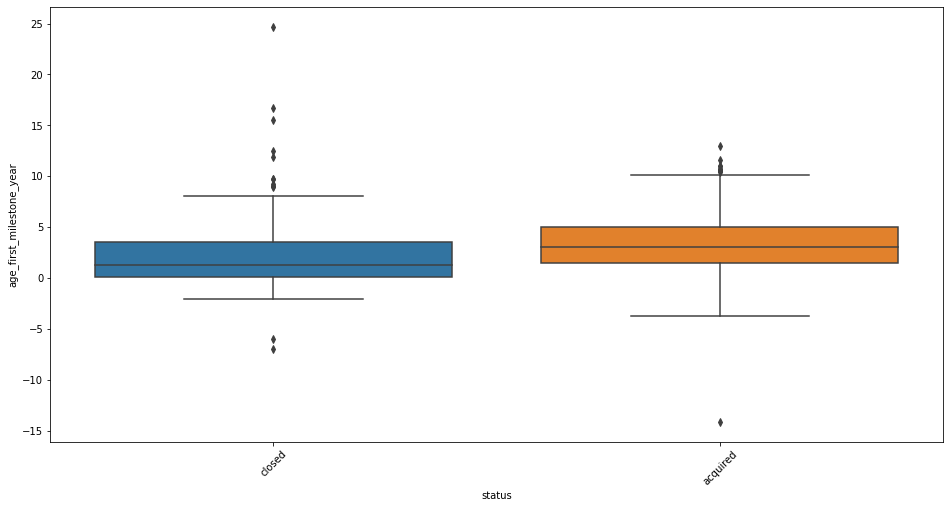

In [189]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'age_first_milestone_year', x = 'status', data = startup, 
           order = startup.groupby('status')['age_first_milestone_year'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

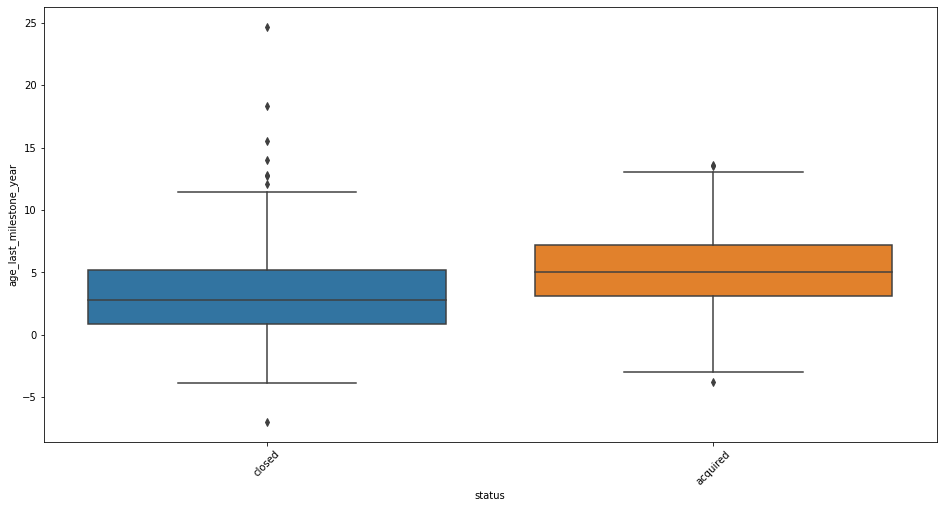

In [190]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'age_last_milestone_year', x = 'status', data = startup, 
           order = startup.groupby('status')['age_last_milestone_year'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

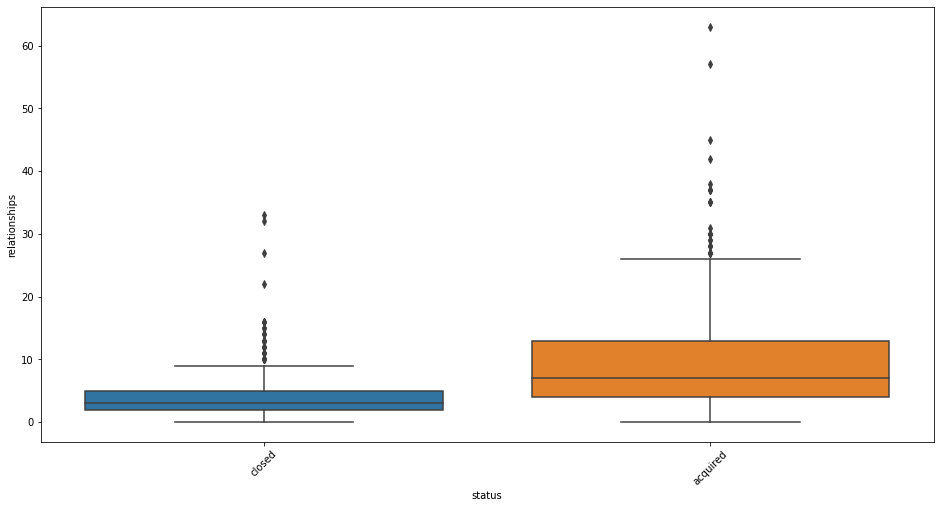

In [191]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'relationships', x = 'status', data = startup, 
           order = startup.groupby('status')['relationships'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

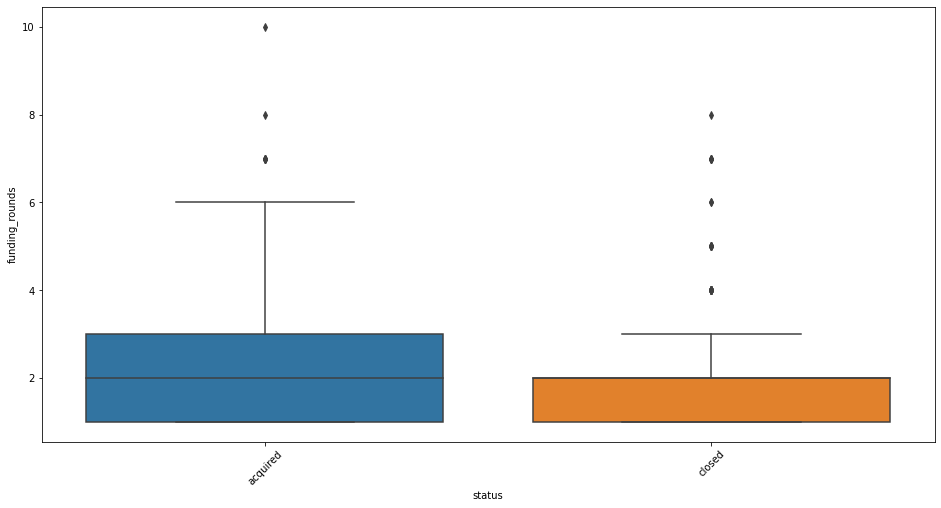

In [192]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'funding_rounds', x = 'status', data = startup, 
           order = startup.groupby('status')['funding_rounds'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

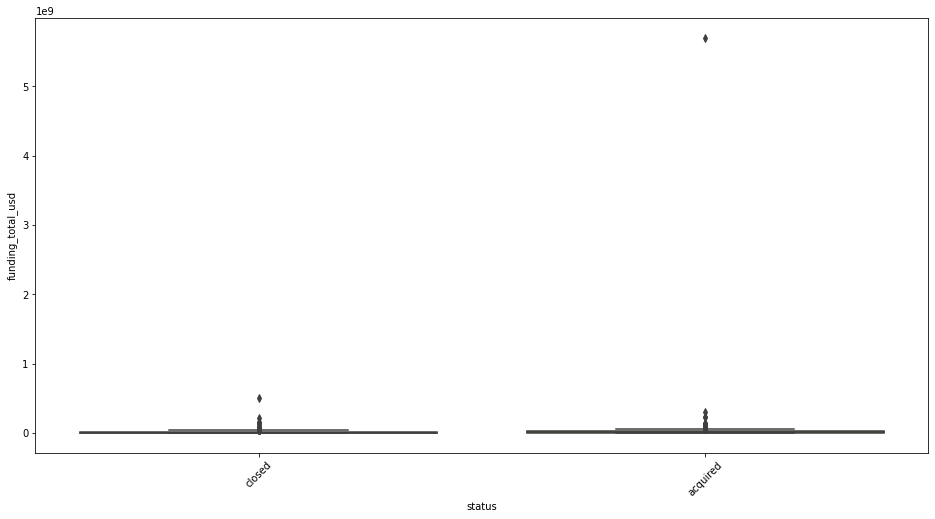

In [193]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'funding_total_usd', x = 'status', data = startup, 
           order = startup.groupby('status')['funding_total_usd'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

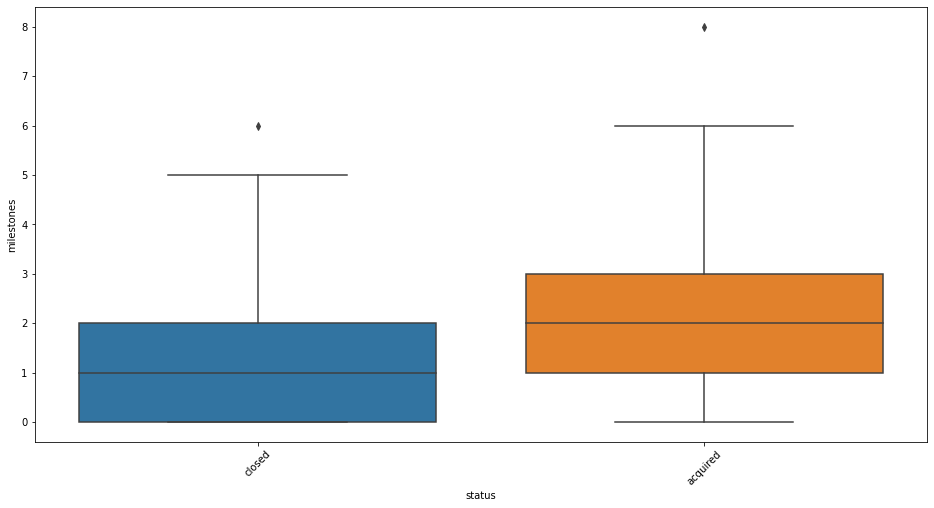

In [194]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'milestones', x = 'status', data = startup, 
           order = startup.groupby('status')['milestones'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

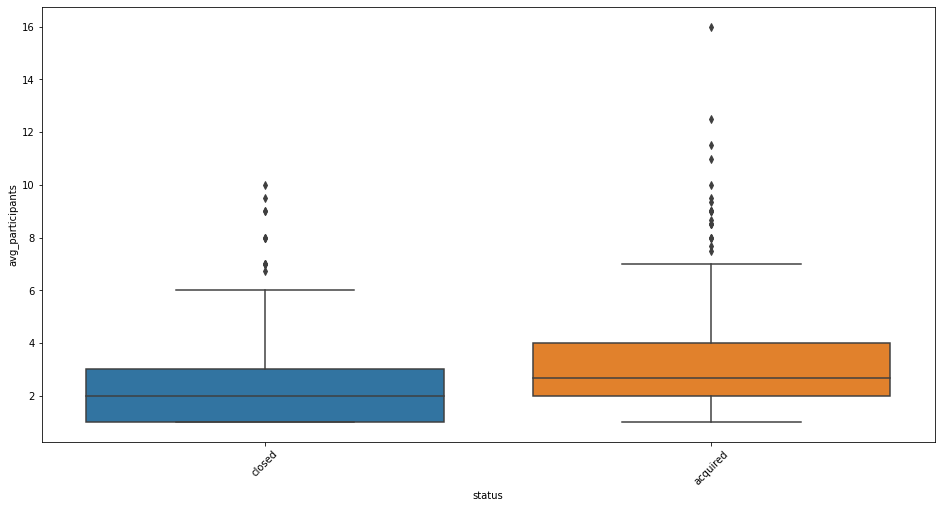

In [195]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'avg_participants', x = 'status', data = startup, 
           order = startup.groupby('status')['avg_participants'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

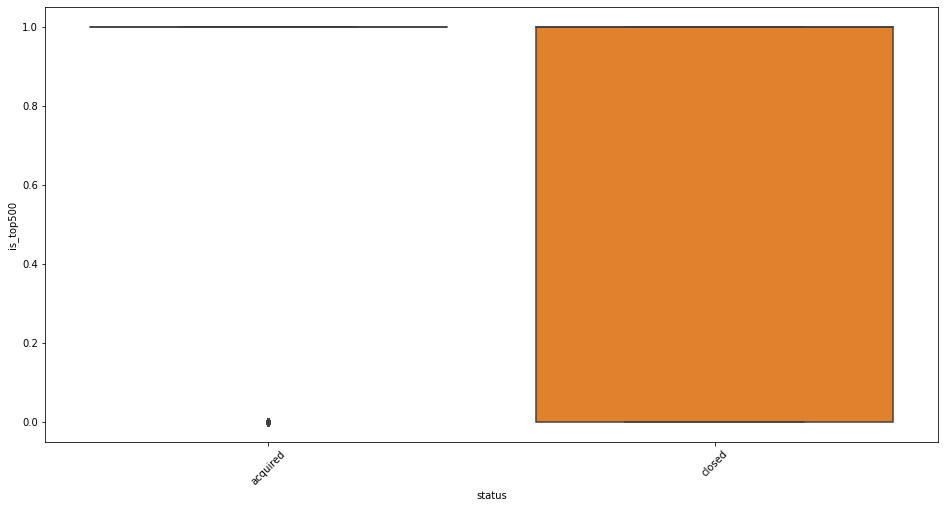

In [196]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'is_top500', x = 'status', data = startup, 
           order = startup.groupby('status')['is_top500'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

### Categorical Variables against Status 

In order to analyse Categorical variables against status, it is first integral to identify which categorical variables are present in the dataset. Some variables may not necessarily contain "text" but may still be categorical. It was observed that some of the variables contained the object dtype. Thus, these variables were first shortlisted.

In [197]:
categorical = startup.select_dtypes('object').columns.tolist()
print(categorical)

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id', 'status']


The "remove" list shown below contains variables from the object dtypes that may not be best representated using categorical analysis. 

In [198]:

# REMOVING VARIABLES THAT CAN BEST BE REPRESENTED DIFFERENTLY/MAY NOT BE RELEVANT 
remove = ['zip_code','city','state_code', 'id','name', 'founded_at', 'closed_at','Unnamed: 6','state_code.1','object_id', 'first_funding_at','last_funding_at']



for label in remove:
    categorical.remove(label)
    
# APPENDING CATEGORICAL VARIABLES DISGUISED IN THE INT DTYPE (BINARY VARIABLES)
for column in startup.columns:
    if 'is_' in column or '_has' in column:
        categorical.append(column)
print(categorical)

['category_code', 'status', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'is_top500']


In [199]:
categorical.remove('status')

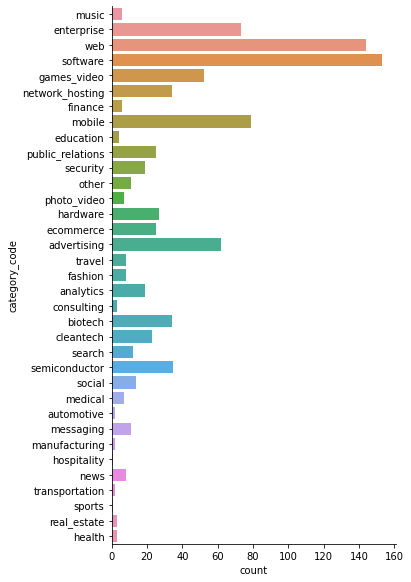

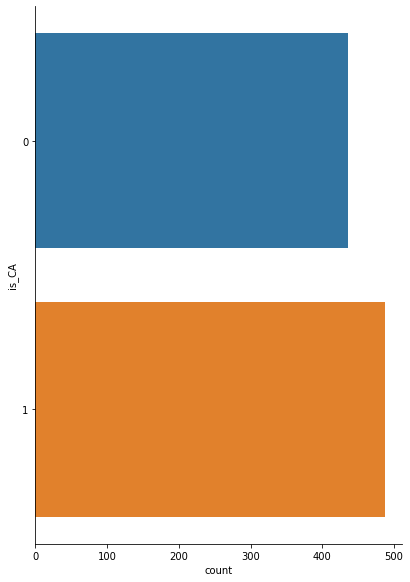

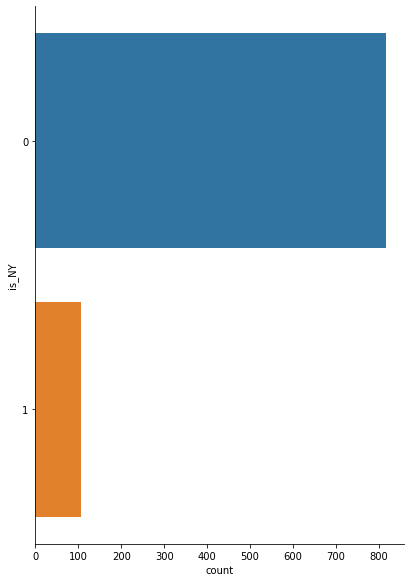

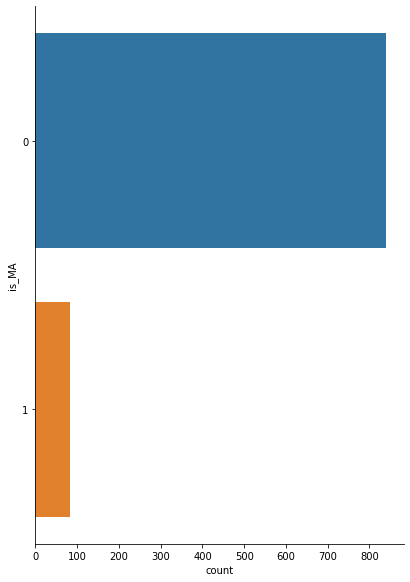

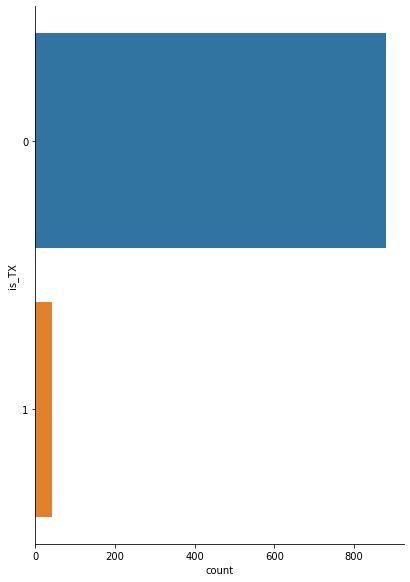

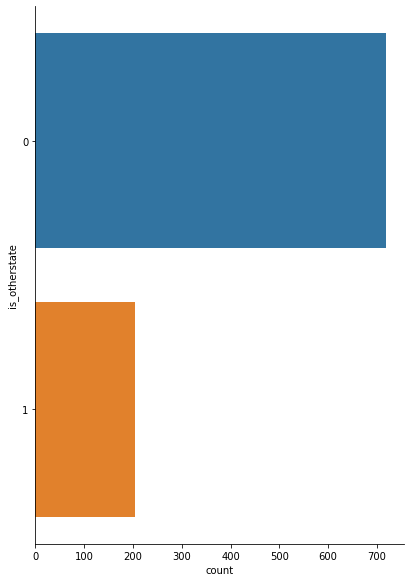

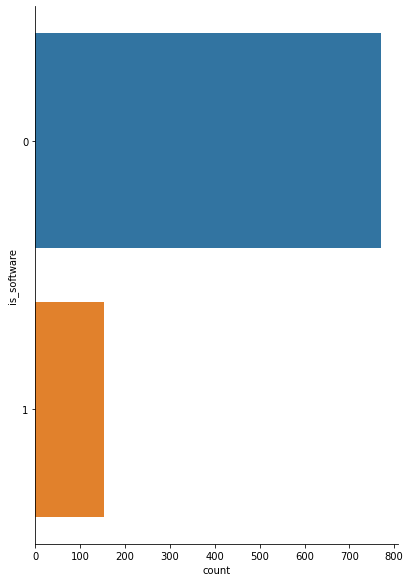

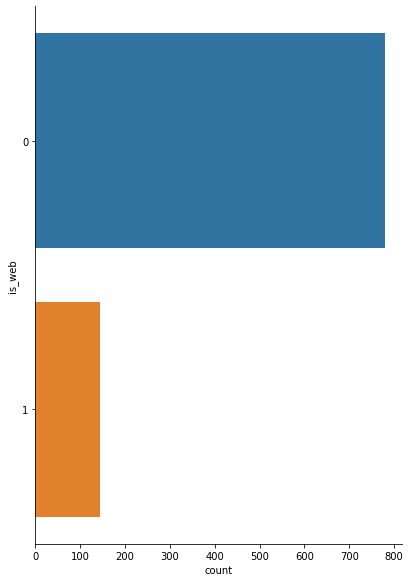

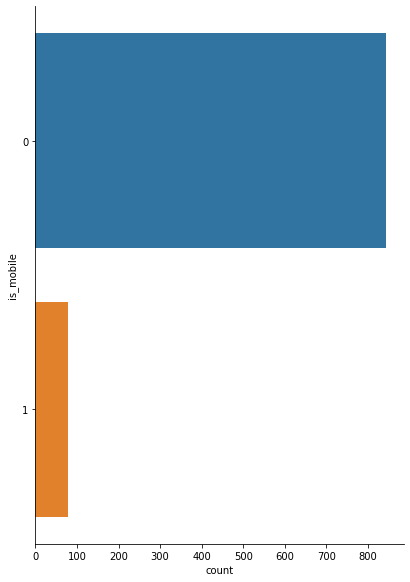

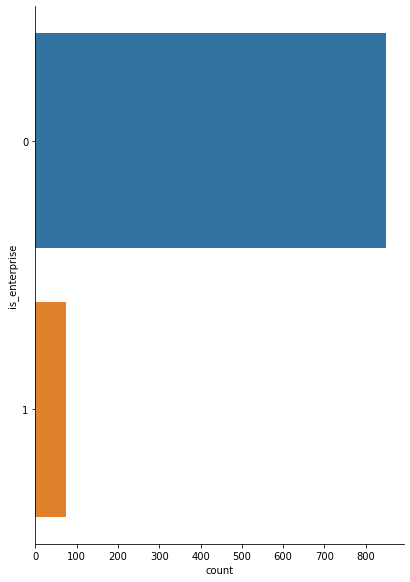

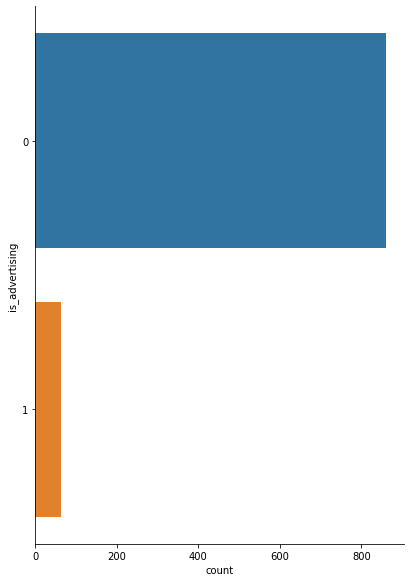

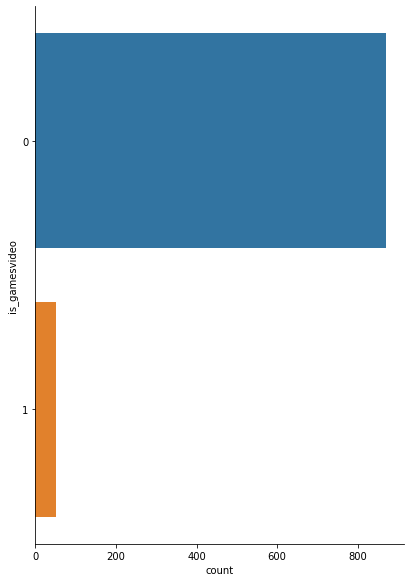

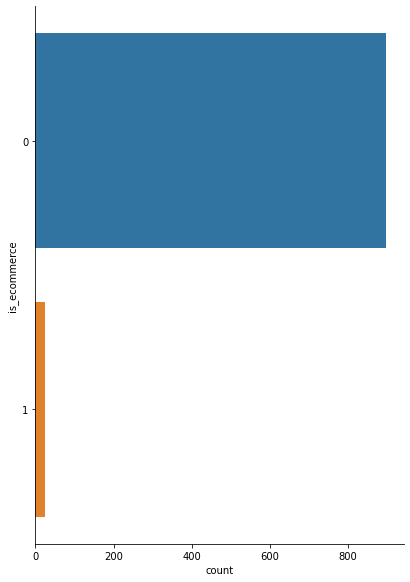

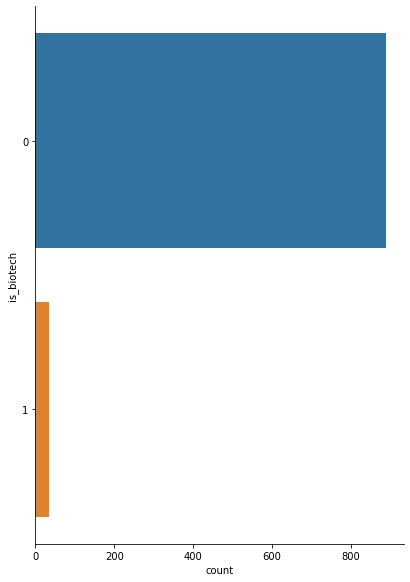

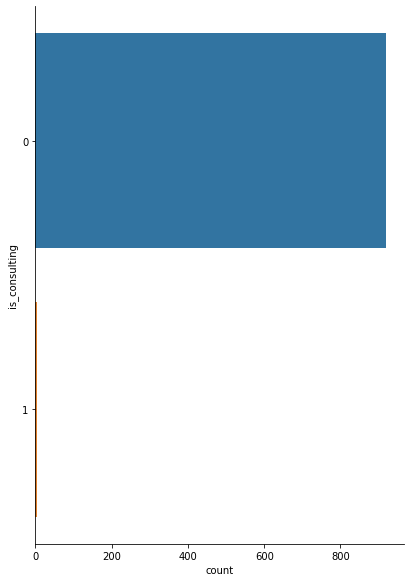

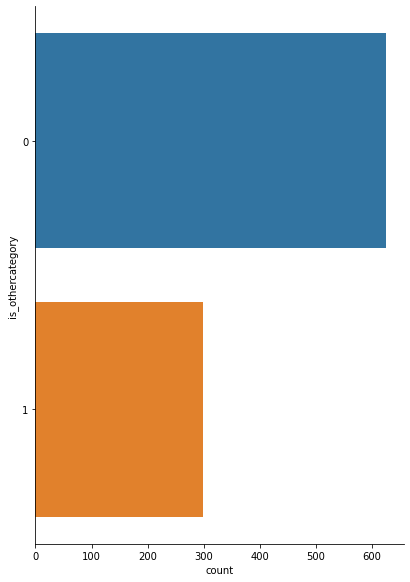

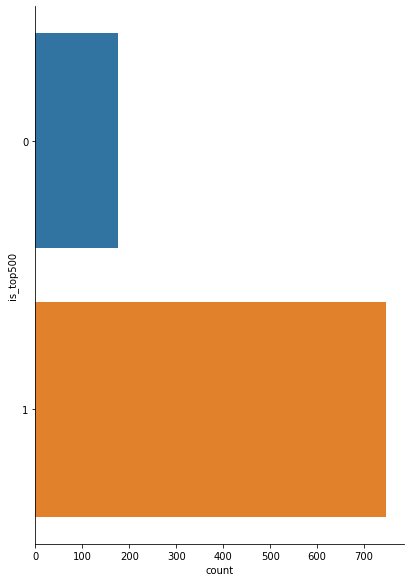

In [200]:
for var in categorical:
    sns.catplot(y = var, data = startup, kind = "count", height = 8,aspect = 0.7)

It can be seen that most binary variables, except is_top500 have a larger number of 0 values, as compared to 1. Thus, while we can compare the values belonging to 0 with each other, it would not be fair to compare values across categories 0 and 1, as there is an uneven distribution of data

#### Comparing Categorical Variables against status

In order to visually represent this comparison, bar charts seemed to be a good tool to visualise the relation of data entries within the categories. It is easier for users to visualise and comprehend data by comparing the length of the graphs

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaaga

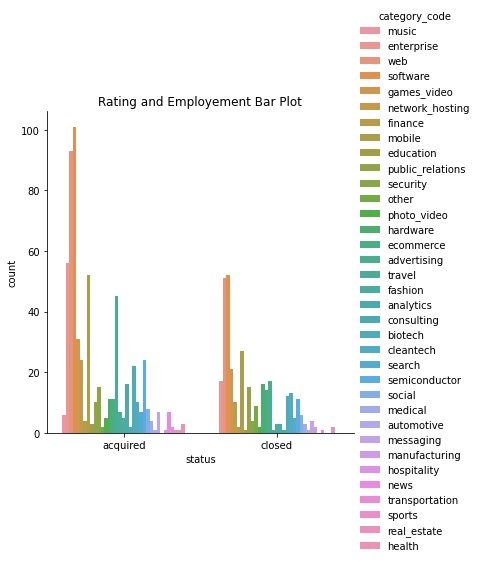

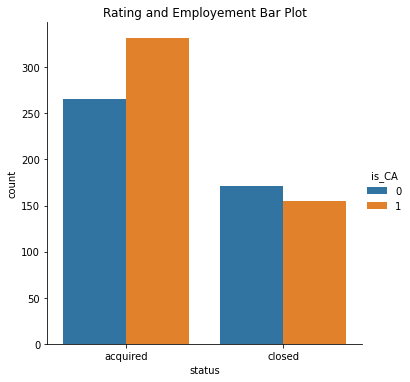

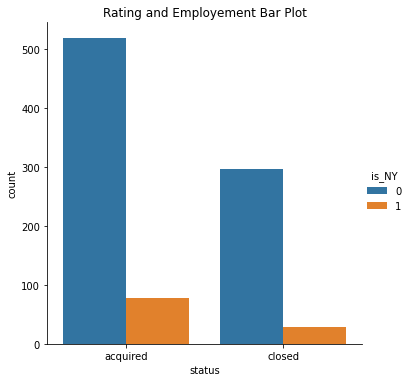

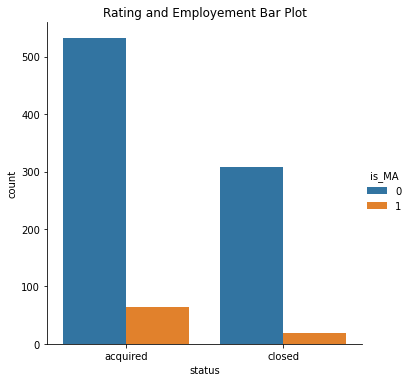

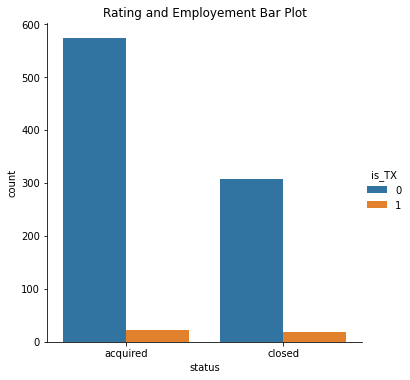

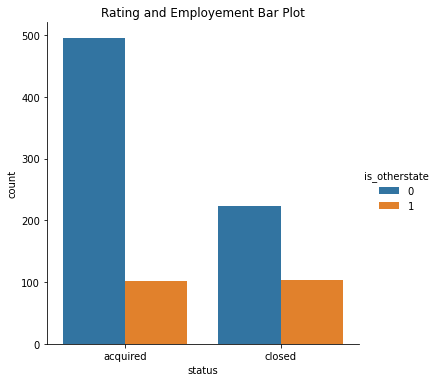

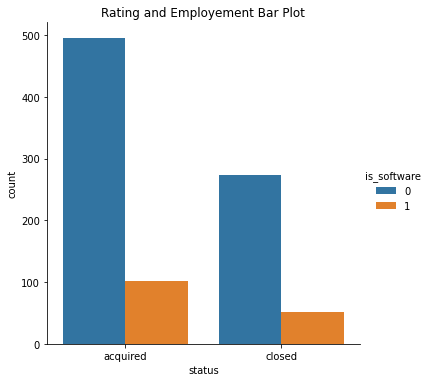

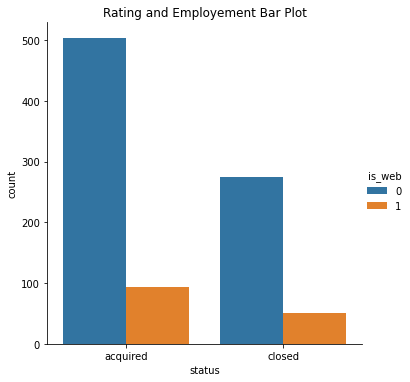

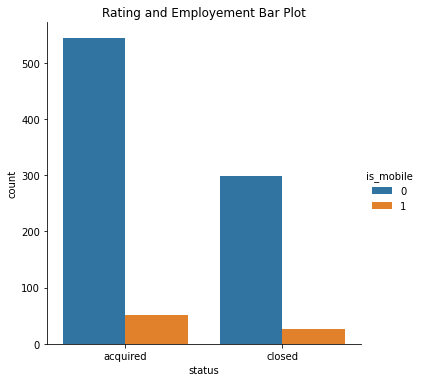

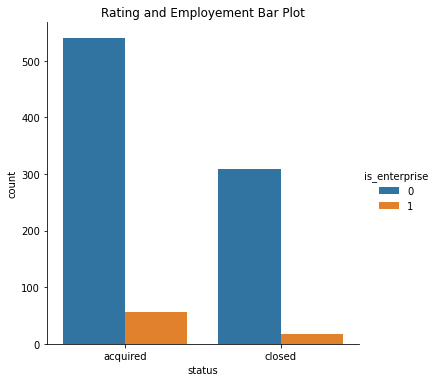

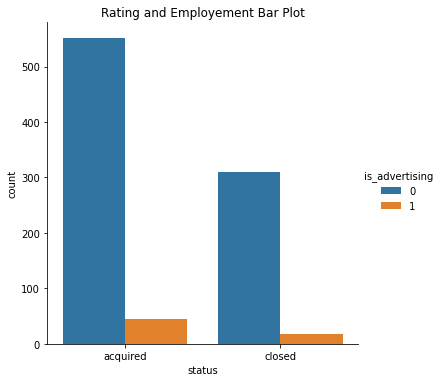

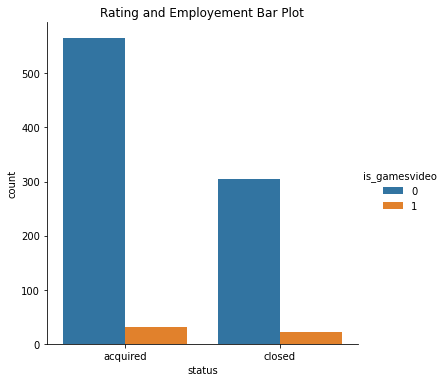

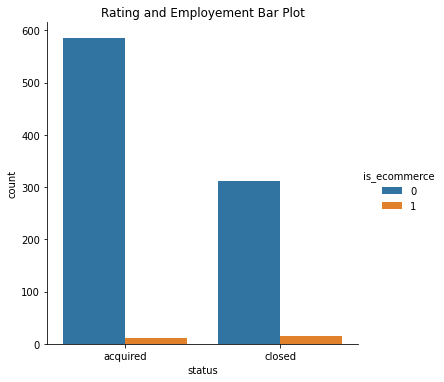

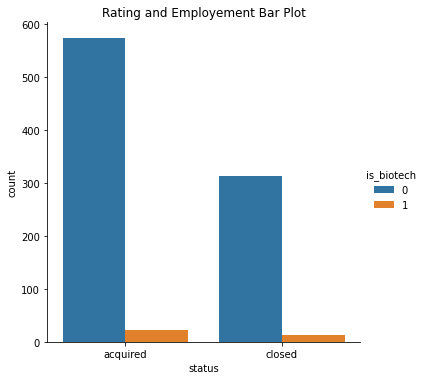

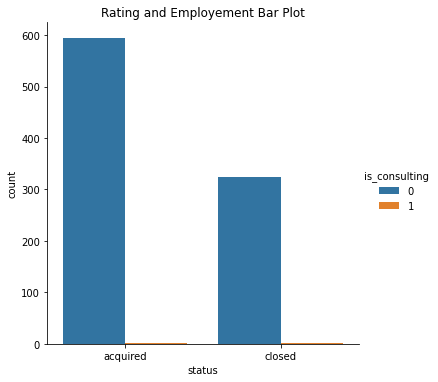

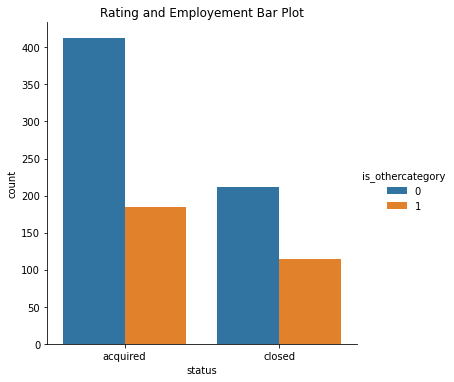

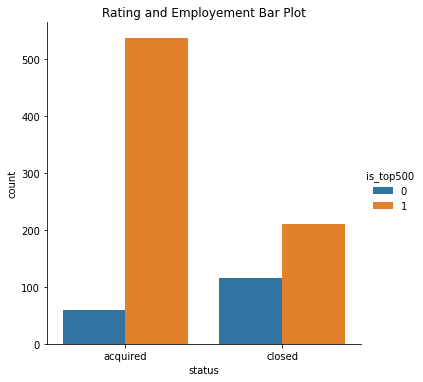

In [201]:
for var in categorical:
    
    # fig, ax = plt.subplots()

    ax = sns.catplot("status", hue=var, data=startup, kind="count", legend=True)



    plt.title("Rating and Employement Bar Plot")

- From these bar plots, the hue depicts the amount of variables that belong to the particular category. For most countries, or variables such as is_NY, is_CA, etc, it can be seen that when comparing the orange bars, or the data points that belong to that particular country, the percentage of acquired data points to "closed" datapoints are extremely similar. In fact, it can visually be represented as an almost 50-50 relationship for some of the countries. This can be further explored by geographically analysing this data later in the notebook

- Is_top500 depicts some correlation with the status of the status of the startup. From the datapoints that contain startups in the is_top500 category (orange), the amount of startups that have been acquired are a lot higher than the amount that have been closed. On the other hand, for startups that do not belong to the is_top500 category, a much larger number of startups have been closed, as compared to acquired


#### Using Pearson's Chi-Squared Testing to analyse Categorical Data

Another technique that has been utilised is the chi-square testing methodology. In order to execute this methodology, the crosstabs or contigency tables for each variable against status was computed, that highlighted the distribution of the variables with respect to the status of the startup

In [202]:
import pandas as pd
import numpy as np
import os 
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

In [203]:
print(categorical)
categorical.append('status')

['category_code', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'is_top500']


###### Generating Cross Tabs for Categorical Variables against Status

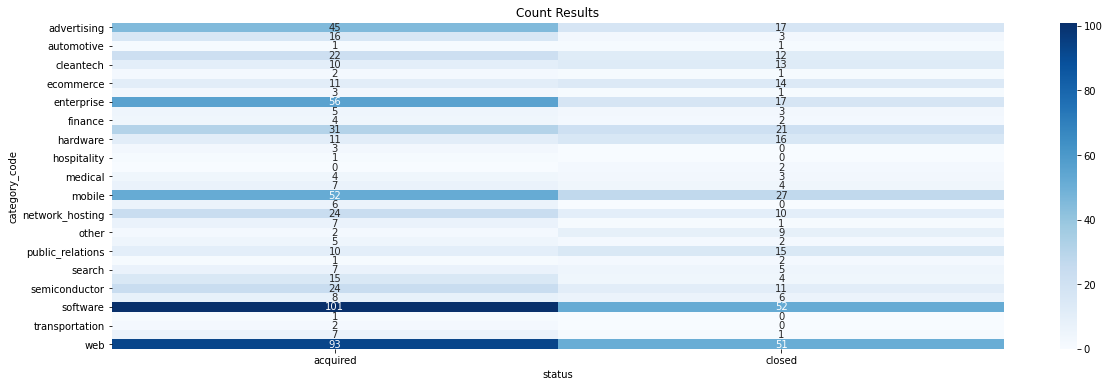

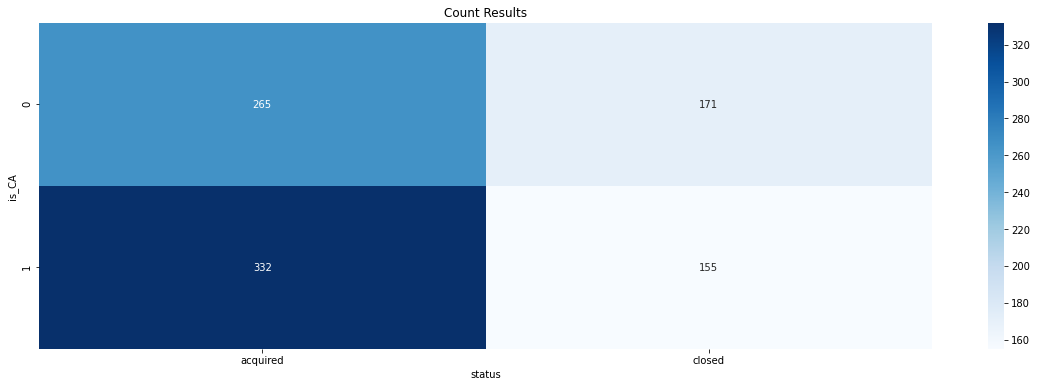

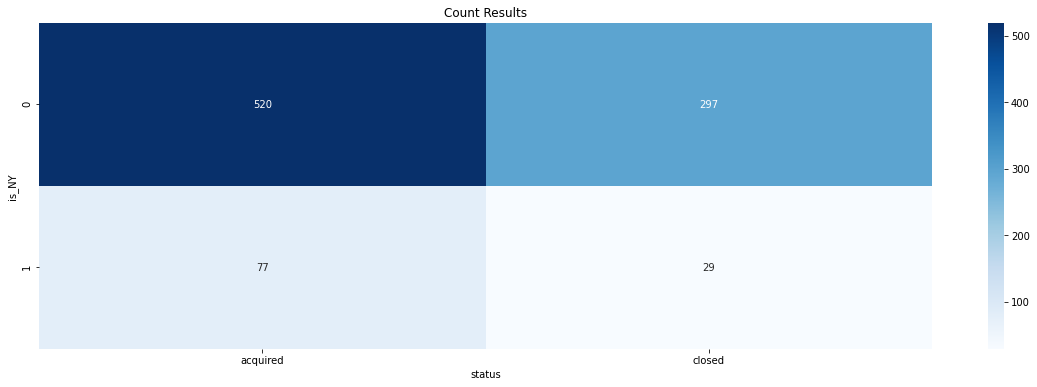

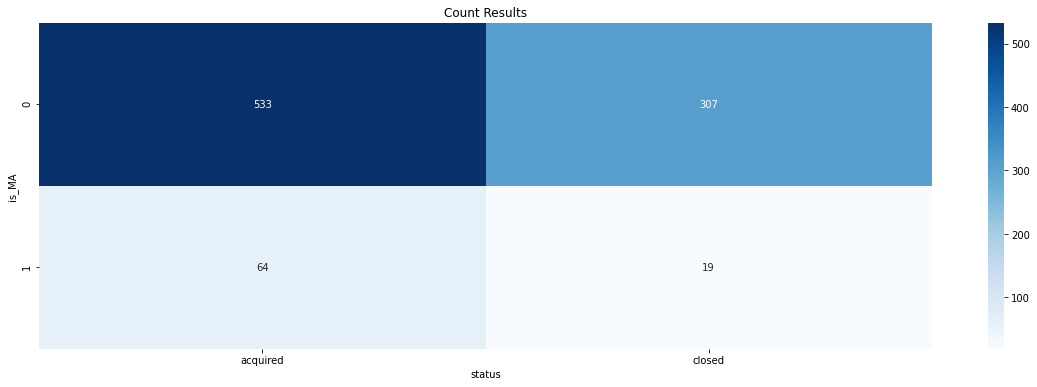

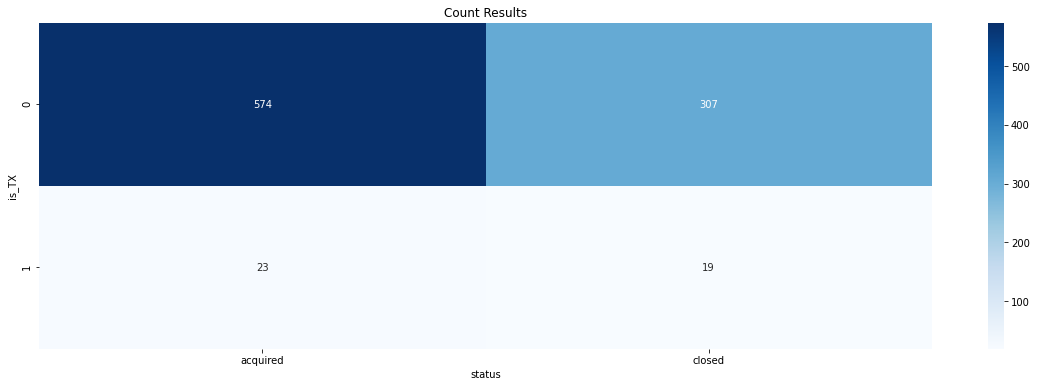

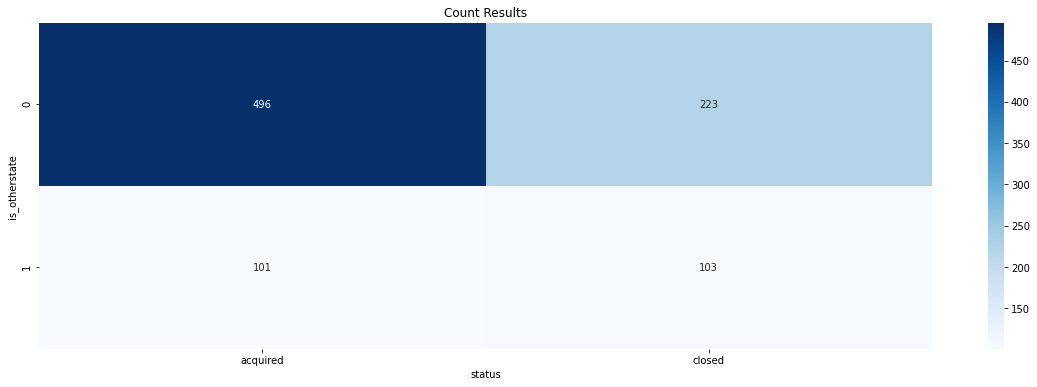

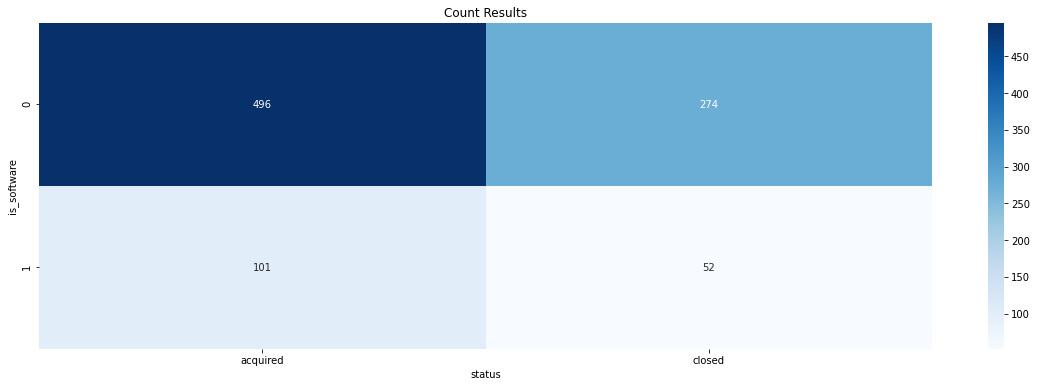

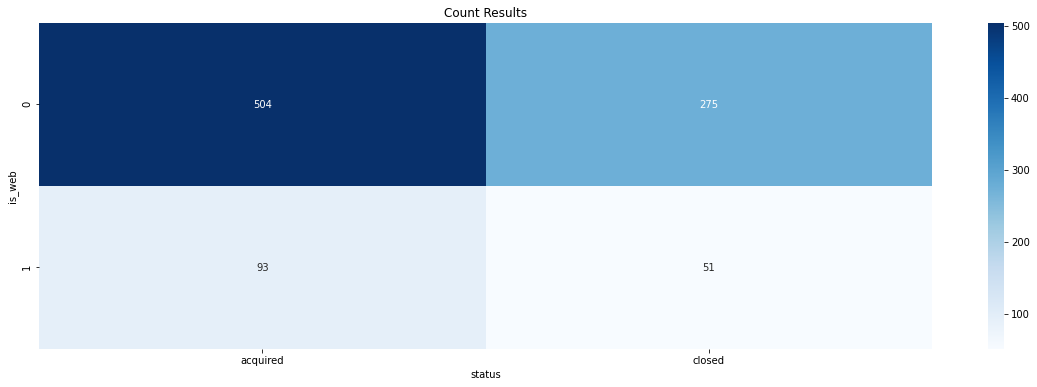

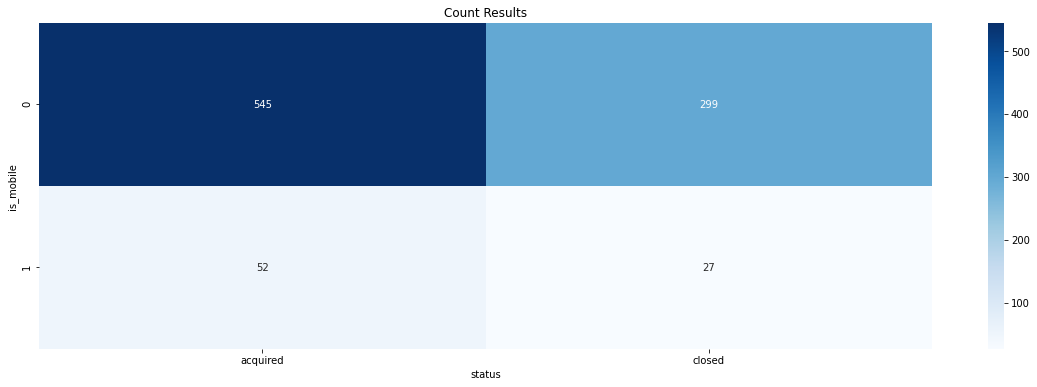

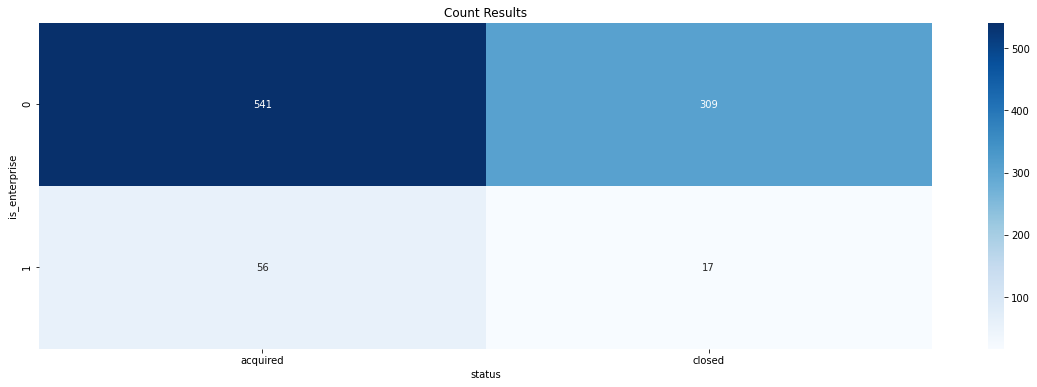

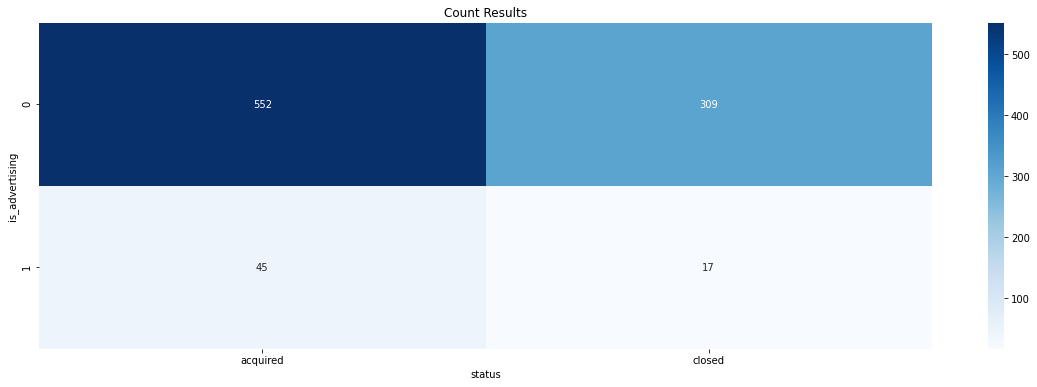

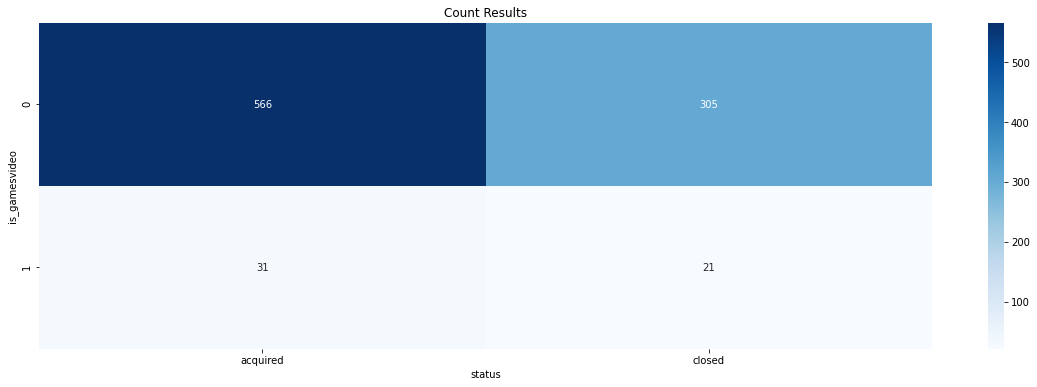

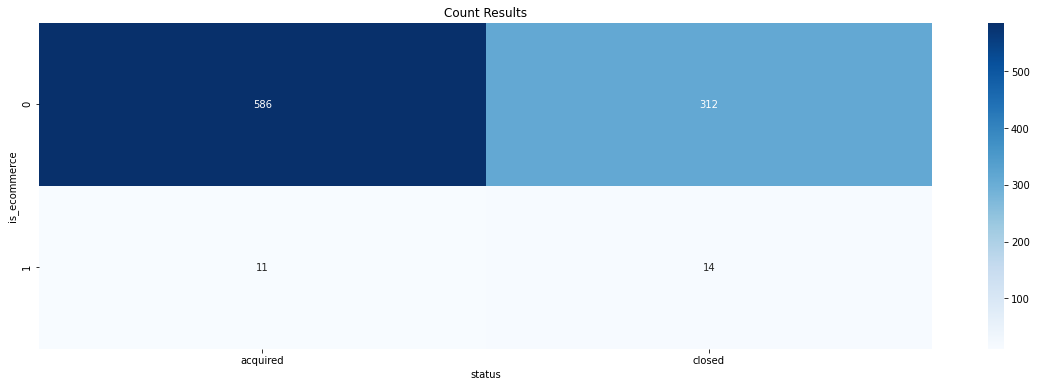

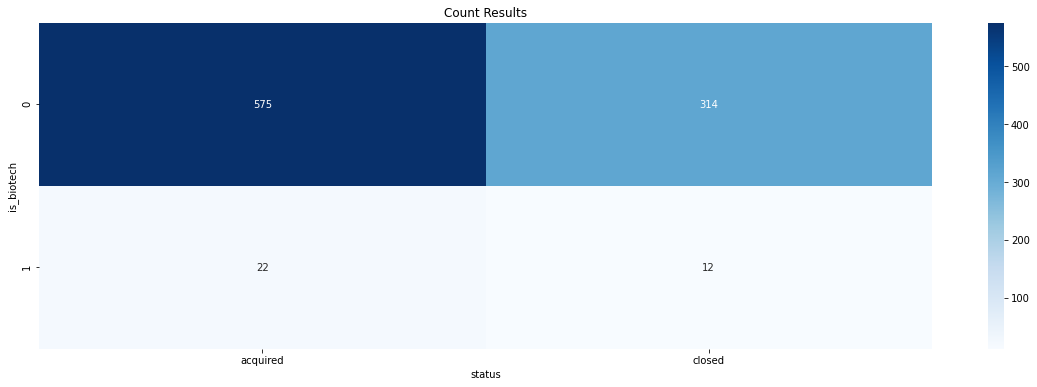

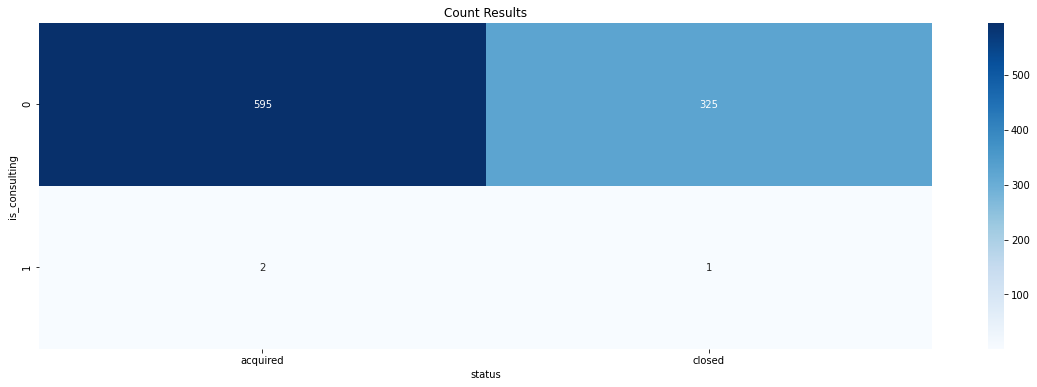

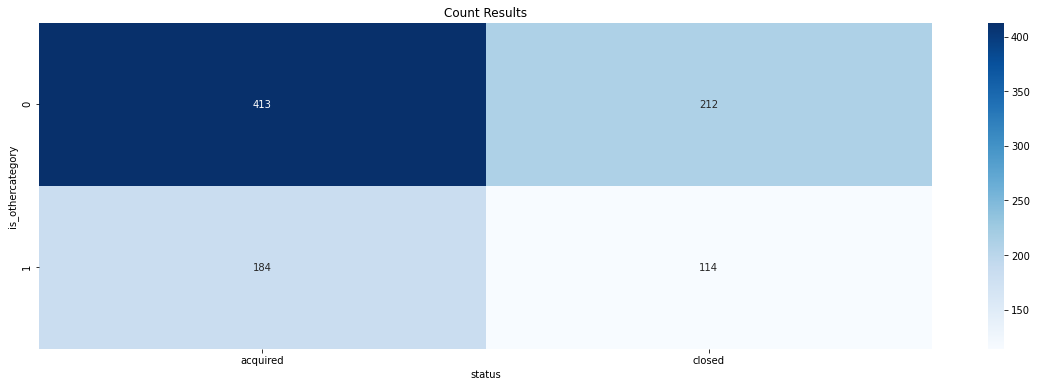

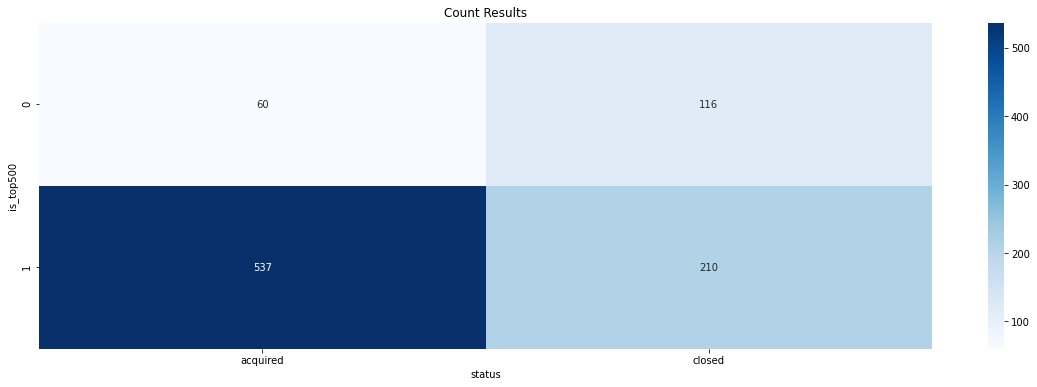

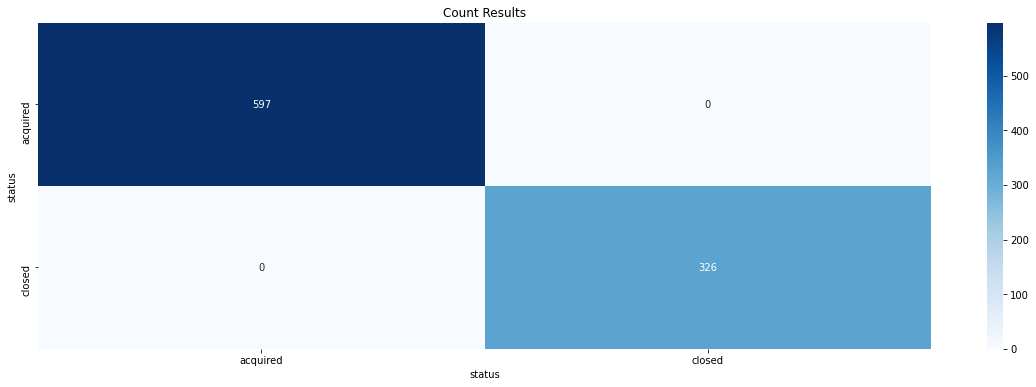

In [204]:
# Setting counters to zero
column_names=categorical
# Assiging column names to row indexs 
chisqmatrix=pd.DataFrame(startup,columns=column_names,index=column_names,dtype = 'float')


outercnt=0
innercnt=0
for icol in column_names: # Outer loop
    for jcol in column_names: # inner loop
        # Converting to cross tab as for CHi-square test we have
        # to first convert variables into contigency table
        mycrosstab=pd.crosstab(startup[icol],startup[jcol])
#         print(mycrosstab)
        #Getting p-value and other usefull information
        stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
        
        if jcol == 'status':
            fig = plt.figure(figsize=(20,6))
            sns.heatmap(mycrosstab, annot=True, cmap='Blues',fmt='g')
            plt.title('Count Results')
            plt.show()
        # Rounding very small p-values to zero
        chisqmatrix.loc[icol,jcol]=round(p,5)
#         print(icol,jcol)
#         print(round(p,5))
        # As mentioned above Expected frequencies should be at 
        # least 5 for the majority (80%) of the cells.
        # Here we are checking expected frequency of each group
        cntexpected=expected[expected<5].size
        #Getting percentage 
        perexpected=((expected.size-cntexpected)/expected.size)*100

        if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2 #Assigning 2
            if icol==jcol:
                chisqmatrix.loc[icol,jcol]=0.00
                innercnt=innercnt+1
                outercnt=outercnt+1
            innercnt=0
# chisqmatrix

- Category code:

     - From this crosstab, the goal was to identify which categories had the largest percentage of acquired startups, rather than simply comparing the magnitude of the datapoints belonging to the two acquired categories. 
     - Software consisted of around 66% acquired startups. Advertising contained 73% of acquired startups. Enterprise comprised of 76% of acquired Startups. These were identified to be the categories that had high acquired percentages, with a large amount of datapoints to judge from. 
     - Categories that contained a low percentage of acquired startups included finance and hardware. In fact , a few startups, such as public relations contained a lower number of acquired startups (10) as compared to closed (15). However, this may also be due to the lack of data entries. 
  
- is_top500:
     - From the crosstab, it can be seen that out of the companies that belong to is_top500, (total: 747), 537 acquired, indicating that a stark 71% of companies belonging to the is_top500 category are also acquired. 
     - For companies that did not belong to is_top500, a larger number of startups were closed instead of acquired. 


###### Generating Chi-Squared Matrix

The two hypothesis that are considered while conducting the chi-square testing are as follows:

- H0 (Null Hypothesis) = The 2 variables to be compared are independent.
- H1 (Alternate Hypothesis) = The 2 variables are dependent. 

The values in the correlation matrix can be assessed as follows:
- If the p-value < 0.05, the Null Hypothesis (H0) is rejected and the Alternate Hypothesis (H1) is accepted
- If the p-value > 0.05, the Null Hypothesis is accepted, and the Alternate Hypothesis is rejected. 

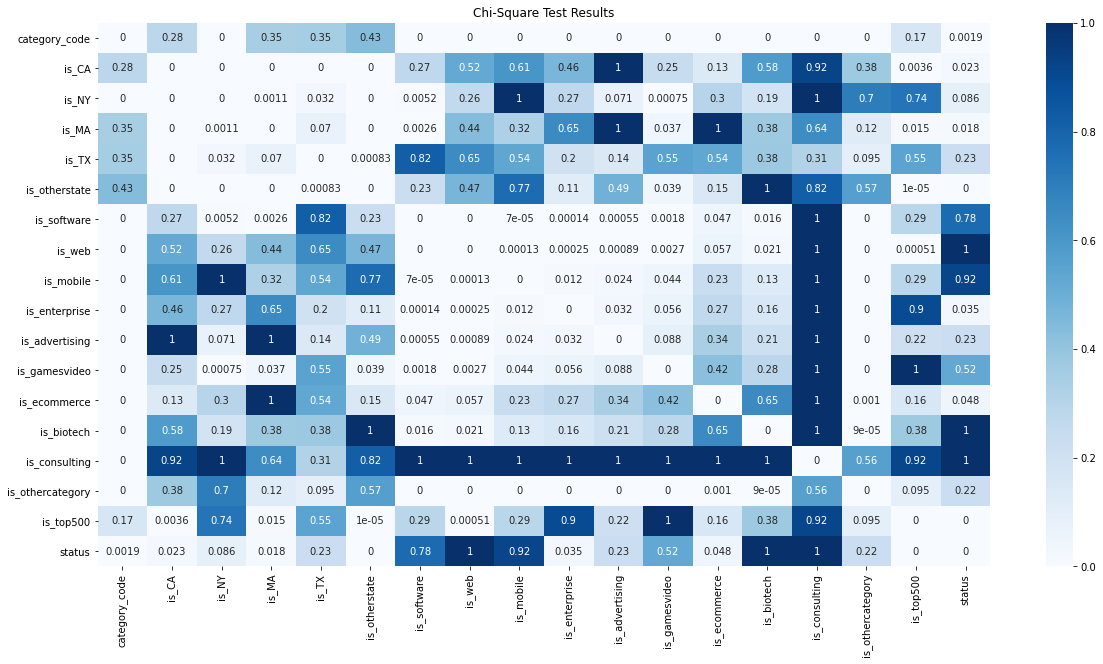

In [205]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(chisqmatrix, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

The column that interests this analysis the most is the "status" column. It can be seen that datapoints such as is_top500 have a 0 p-value, indicating that the correlation between is_top500 and status is extremely close. 

Moreover, category_code has a 0.0019 p-value, inicating that it is an extremely important factor in the prediction of the status of the companies. Specifically, the categories that produced large correlations were e-commerce and enterprise.


#### Geographical Analysis for Status

In [206]:
!pip install plotly
import plotly.graph_objects as go
import plotly.express as px

In [207]:
fig = px.density_mapbox(startup, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=1,
                        mapbox_style="stamen-terrain")
fig.show()

From the graph above, it can be seen that most of the startups are situated in the United States of America. Thus, further analysis will solely be done on these countriess

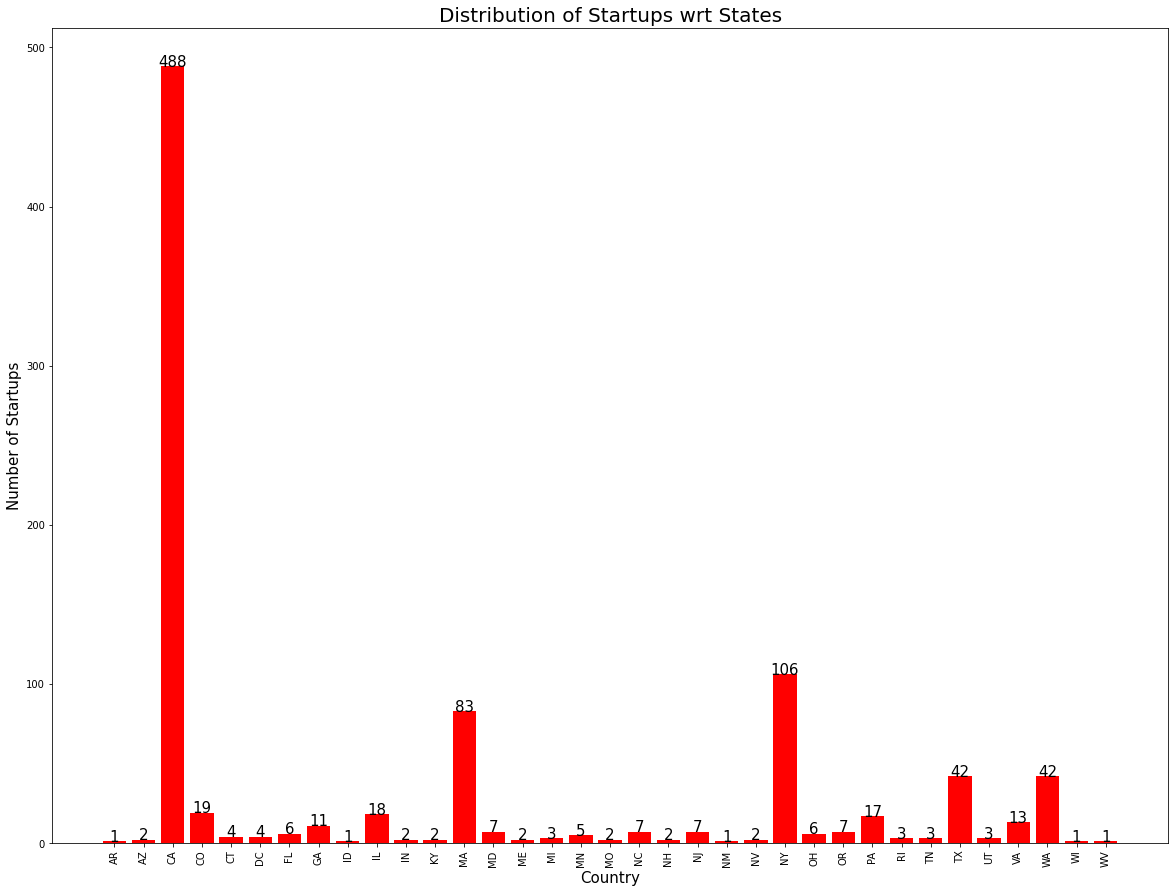

In [208]:
startups_by_state = startup['state_code'].groupby(startup['state_code']).count()
startups_by_state


# Plot Country
fig = plt.figure(figsize=(20,15))
startups_by_state_df = pd.DataFrame({'Country':startups_by_state.index,'Count':startups_by_state.values})
plt.bar(startups_by_state_df['Country'], height = startups_by_state_df['Count'], color='red')
plt.xticks(rotation=90)
plt.xlabel("Country", size=15)
plt.ylabel("Number of Startups", size=15)
y=startups_by_state_df['Count']
for i,v in enumerate(y):
    plt.text(x=i, y=v, s=str(v), horizontalalignment='center', size=15)
plt.title("Distribution of Startups wrt States", size=20)
plt.show()

In [209]:
startups_by_state = startups_by_state.to_frame('count').reset_index()
import plotly.express as px  # Be sure to import express
fig = px.choropleth(startups_by_state,  # Input Pandas DataFrame
                    locations="state_code",  # DataFrame column with locations
                    color="count",  # DataFrame column with color values
                    hover_name="state_code", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Number of Total StartUps by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()   


#### Distribution of Startups with respect to Status 

##### Distribution of Acquired Startups 

In [210]:
acquired_startups = startup[startup['status']=='acquired']
acquired_startups_by_state = acquired_startups['state_code'].groupby(acquired_startups['state_code']).count()
acquired_startups_by_state = acquired_startups_by_state.to_frame('count').reset_index()
import plotly.express as px  # Be sure to import express
fig = px.choropleth(acquired_startups_by_state,  # Input Pandas DataFrame
                    locations="state_code",  # DataFrame column with locations
                    color="count",  # DataFrame column with color values
                    hover_name="state_code", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Number of Acquired StartUps by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()   

##### Distribution of Closed Startups 

In [211]:
closed_startups = startup[startup['status']=='closed']
closed_startups_by_state = closed_startups['state_code'].groupby(closed_startups['state_code']).count()
closed_startups_by_state = closed_startups_by_state.to_frame('closed_count').reset_index()
closed_startups_by_state = closed_startups_by_state.rename({'state_code':'closed_state_code'},axis='columns')
import plotly.express as px  # Be sure to import express
fig = px.choropleth(closed_startups_by_state,  # Input Pandas DataFrame
                    locations="closed_state_code",  # DataFrame column with locations
                    color="closed_count",  # DataFrame column with color values
                    hover_name="closed_state_code", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Number of Closed StartUps by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()   

##### Percentage of Closed Startups

In [212]:
startups_compare = pd.concat([startups_by_state,closed_startups_by_state],axis=1)

In [213]:
startups_compare['closed_percentage'] = (startups_compare['closed_count']/startups_compare['count'])*100


In [214]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(startups_compare,  # Input Pandas DataFrame
                    locations="state_code",  # DataFrame column with locations
                    color="closed_percentage",  # DataFrame column with color values
                    hover_name="state_code", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Percentage of Closed StartUps by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()   

Since it was rather unfair to represent the number of closed and acquired startups for startups containing a lower number of data entries, the geographical cloropleth map for the percentage of closed startups was produced. 
The lighter the color of the map (yellow), the larger the percentage of closed startups. 

- It can be seen that states such as Oregon (OR) seem to have the darkest color/most desirable output, with only 14.29% of closed startups. Other states with a low percentage include Colorado (CO), New York (NY), Maryland (MD),Massachusetts (MA), and CA 

- States with a high percentage of closed startups include: New Mexico (NM), Idaho (ID), Arizona (AZ), Ohio (OH), and Wisconsin (WI)

## Analysing Funding 

In [215]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

### Funding Against Numeric

Comparing funding_total_usd, our predictor variable, to other numeric varibles to see the correlation between them.

In [216]:
#Funding against Numeric
rounds = pd.DataFrame(startup[['has_VC', 'has_angel', 'has_roundA', 'has_roundB','has_roundC','has_roundD','status','city','age_first_funding_year','funding_rounds','funding_total_usd']])

In [217]:
rounds.head()
print("Data type:", type(rounds))
print("Data dimensions:", rounds.shape)


Data type: <class 'pandas.core.frame.DataFrame'>
Data dimensions: (923, 11)


                        has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
has_VC                       1         -0          -0          -0           0   
has_angel                   -0          1          -0          -0          -0   
has_roundA                  -0         -0           1           0          -0   
has_roundB                  -0         -0           0           1           0   
has_roundC                   0         -0          -0           0           1   
has_roundD                   0         -0          -0           0           0   
age_first_funding_year       0         -0          -0          -0           0   
funding_rounds               0          0           0           0           0   
funding_total_usd            0         -0          -0           0           0   

                        has_roundD  age_first_funding_year  funding_rounds  \
has_VC                           0                       0               0   
has_angel                       -

<AxesSubplot:>

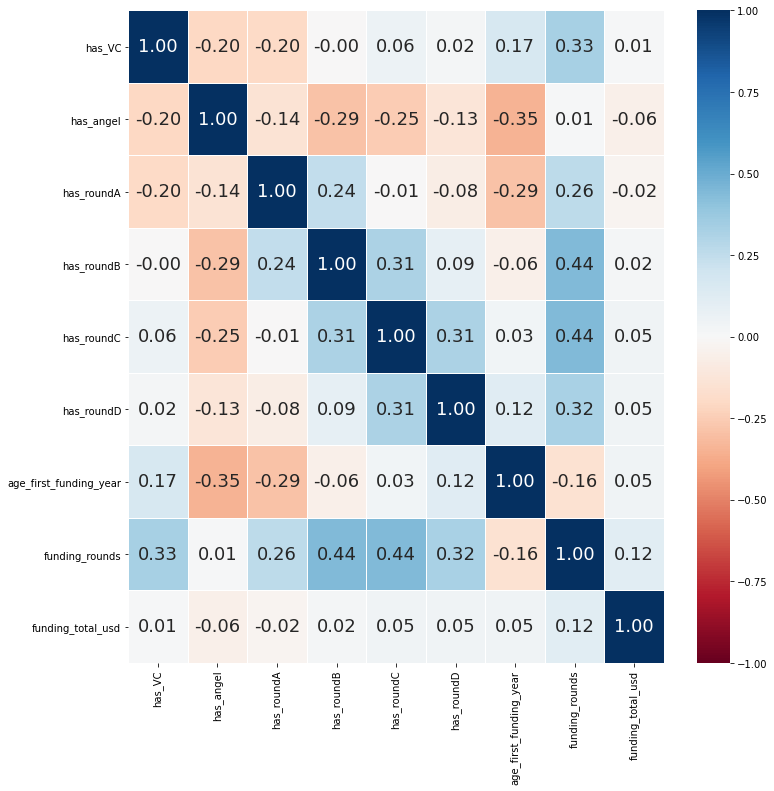

In [218]:
# Correlation Matrix
print(rounds.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sns.heatmap(rounds.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As seen from the heatmap, funding_total_usd does not have a strong correlation with any of the variables

### Funding Against Categorical

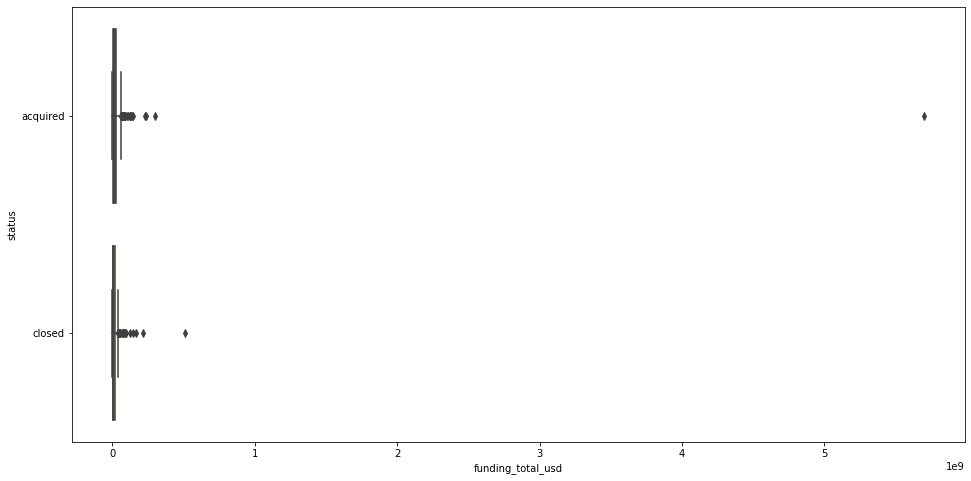

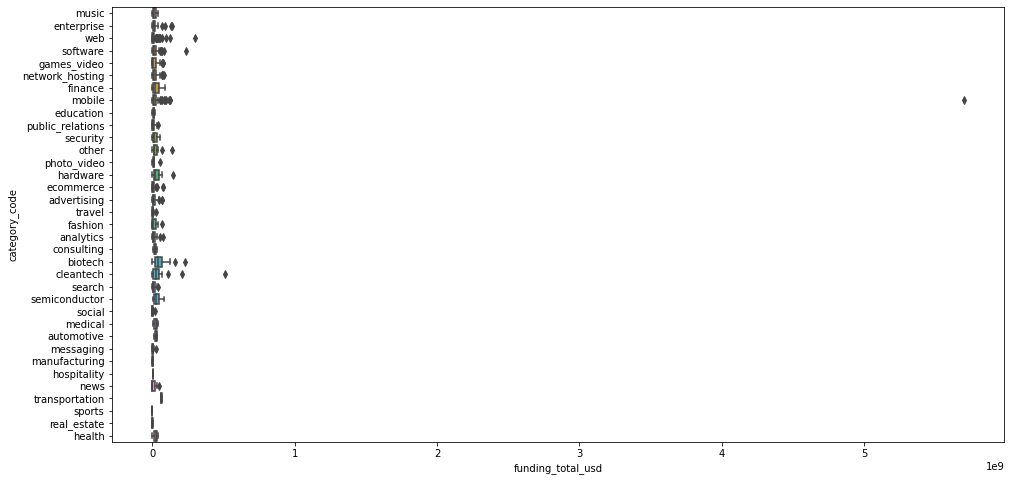

In [397]:
x = pd.DataFrame(startup[['status','category_code']])
y = pd.DataFrame(startup[['funding_total_usd']])
# start[['funding_total_usd']]
for var in x:
    f = plt.figure(figsize=(16, 8))
    sns.boxplot(x = 'funding_total_usd', y = var, data = startup)

From the above graph we see that there is an issue with the skewness of funding_total_usd, and the skewness is 29 as seen below. Thus, we have to fix the skewness to be able to interpret the graphs.


In [221]:
y.describe()

,funding_total_usd
count,923
mean,25419749
std,189634364
min,11000
25%,2725000
50%,10000000
75%,24725000
max,5700000000


In [222]:
y.skew()

funding_total_usd   29
dtype: float64

In [223]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
transformed_data = stats.boxcox(startup['funding_total_usd'])[0]
param = stats.boxcox(startup['funding_total_usd'])[1]
print(param)
pd.Series(transformed_data).skew()

0.15091569377789232


0.07921922786328907

In [224]:
y=pd.Series(transformed_data)

In [225]:
y.skew()

0.07921922786328907

In [226]:
#Removing the Outliers
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(y, 25), percentile(y, 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in y if x < lower or x > upper]
# remove outliers
y = [x for x in y if x > lower and x < upper]

In [227]:
y=pd.DataFrame(y)
print(y)
y.describe()

     0
0   39
1   86
2   55
3   86
4   49
..  ..
915 47
916 90
917 88
918 74
919 77

[920 rows x 1 columns]


,0
count,920
mean,67
std,18
min,20
25%,55
50%,69
75%,80
max,115


In [228]:
y1=pd.Series(transformed_data)

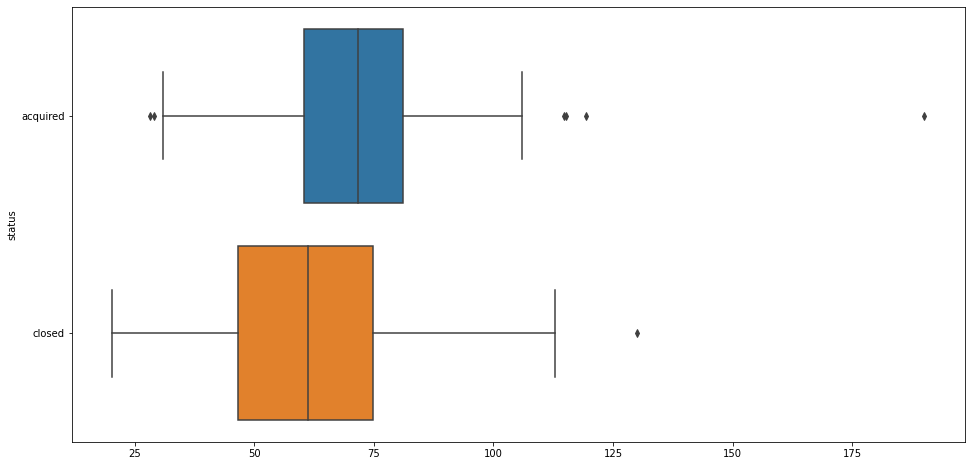

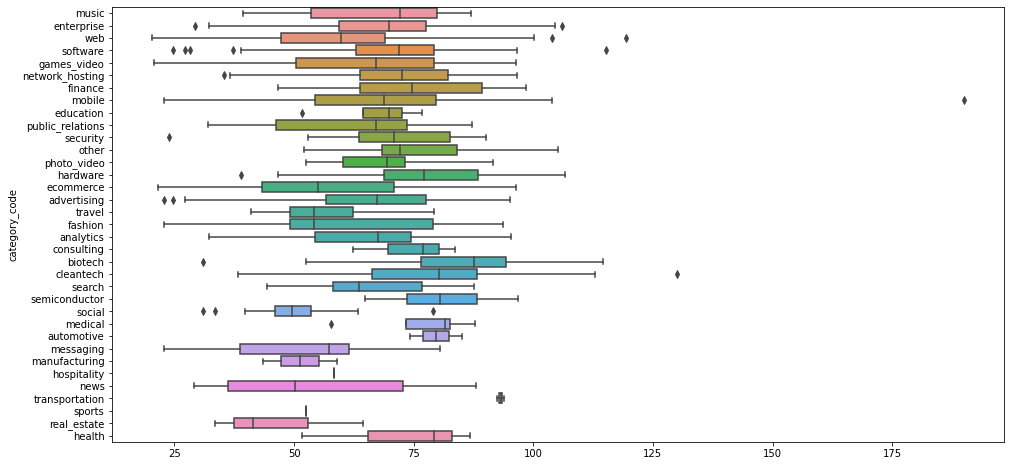

In [396]:
x = pd.DataFrame(startup[['status','category_code']])
# start[['funding_total_usd']]
for var in x:
    f = plt.figure(figsize=(16, 8))
    sns.boxplot(x = y1, y = var, data = startup)

As seen from the first boxplot, the a greater number of startups were funded that actually failed. From the startups that received funding, the ones that failed were more than the ones that succeeded.
As seen from the second boxplot, Biotech received the highest amount of funding followed by cleantech as seen from the tail end of the boxplot.  

# Adjusting the Parent Data

In [230]:
startup = pd.read_csv("startup.csv")
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42,-71,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1,0,acquired
1,204,CA,37,-122,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,5,1,acquired
2,1001,CA,33,-117,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4,1,acquired
3,738,CA,37,-122,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3,1,acquired
4,1002,CA,38,-122,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1,1,closed


In [231]:
# Dropping based on EDA
startup.drop(columns = ["has_roundA", "has_roundB", "has_roundC", "has_roundD", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate", "has_VC", "has_angel"], inplace=True)
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,avg_participants,is_top500,status
0,1005,CA,42,-71,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,0,0,0,0,1,c:6669,1,0,acquired
1,204,CA,37,-122,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,0,0,0,0,0,0,c:16283,5,1,acquired
2,1001,CA,33,-117,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,0,0,0,0,c:65620,4,1,acquired
3,738,CA,37,-122,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,0,0,0,0,0,0,c:42668,3,1,acquired
4,1002,CA,38,-122,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,1,0,0,0,0,c:65806,1,1,closed


In [232]:
startup.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'avg_participants', 'is_top500',
       'status'],
      dtype='object')

In [233]:
len(startup.columns)

38

# I suspect that "is_other_category" and "age_..." variables are all engineered features.

In [234]:
len(startup.columns)

38

# Problem: Small Data Set
- The original data set only has 923 entries. To expand upon this, we merge another data set exported from Crunchbase https://github.com/datahoarder/crunchbase-october-2013
    - We look for intersections in column names

# Merging Data Sets for More Observations: Looking at Raw Crunchbase Data

In [235]:
cb_companies = pd.read_csv("crunchbase-companies.csv", encoding = "latin")
cb_companies.head()

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012,2012-08-29,2012-08-29,NaN
2,/company/club-domains,.Club Domains,software,7000000,operating,USA,FL,Fort Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011,2013-05-31,2013-05-31,NaN
3,/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,NaN,NaN,NaN,2013-01-03,2013-01-03,2012-01-01
4,/company/1-800-dentist,1-800-DENTIST,health,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986-Q1,1986,2010-08-19,2010-08-19,2010-08-19


In [236]:
cb_companies.columns

Index(['permalink', 'name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at'],
      dtype='object')

In [237]:
cb_companies = cb_companies.set_index("permalink")

In [238]:
cb_investments = pd.read_csv("crunchbase-investments.csv", encoding = "latin")
cb_investments.rename(columns = {"company_permalink": "permalink"}, inplace=True)
cb_investments = cb_investments.set_index("permalink")
cb_investments.head()

<ipython-input-238-7592ab87e291>:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
permalink,,,,,,,,,,,,,,,,,,,
/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012,2000000
/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012,20000
/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012,20000
/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012,20000
/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011,20000


Note that a company can receive multiple investments throughout its lifetime

In [239]:
# Check overlap size
len(list(set(cb_investments.index)&set(cb_companies.index)))

11572

In [240]:
cb_investments.shape, cb_companies.shape

((52870, 19), (17727, 16))

In [241]:
cb_main = pd.merge(cb_companies, cb_investments, left_index = True, right_index = True)
cb_main.head()

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
permalink,,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,...,IND,NaN,Mumbai,Mumbai,venture,2013-01-03,2013-01,2013-Q1,2013,1700000
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,MA,Boston,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011,1000050
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,NY,unknown,Cambridge,angel,2011-07-20,2011-07,2011-Q3,2011,1000050
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,CA,SF Bay,San Francisco,angel,2011-07-20,2011-07,2011-Q3,2011,1000050
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,USA,CA,SF Bay,Palo Alto,angel,2011-07-20,2011-07,2011-Q3,2011,1000050


In [242]:
cb_main.isna().sum()

name                          0
category_code               642
funding_total_usd          2088
status                        0
country_code                  0
state_code                  491
region                        0
city                        532
funding_rounds                0
founded_at                 7644
founded_month              7644
founded_quarter            7644
founded_year               7644
first_funding_at              0
last_funding_at               0
last_milestone_at         10143
company_name                  0
company_category_code       642
company_country_code          0
company_state_code          491
company_region                0
company_city                532
investor_permalink            0
investor_name                 0
investor_category_code    50425
investor_country_code     11999
investor_state_code       16807
investor_region               0
investor_city             12478
funding_round_type            1
funded_at                     1
funded_m

In [243]:
cb_main.shape

(52868, 35)

In [244]:
parent_col = ["name", "state_code", "city", "founded_at", "closed_at", "first_funding_at", "last_funding_at", "relationships", "funding_rounds", "funding_total_usd", "milestones", "category_code", "status"]


closed_at is a redundant variable to include in a model. If a company has a closed_at date, it has obviously already failed.

relationships and milestones will have to be dropped just to reach a compromise for data merging purposes

In [245]:
unwanted_features = ["closed_at", "relationships", "milestones"]
parent_col2 = [x for x in parent_col if x not in unwanted_features]
parent_col2

['name',
 'state_code',
 'city',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'category_code',
 'status']

In [246]:
cb_main[parent_col2]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status
permalink,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating
...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating


In [247]:
cb_main["category_code1"] = cb_main["category_code"]
cb_main_dum = pd.get_dummies(cb_main, columns = ["category_code1"], prefix = "is")
cb_main_dum

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,is_real_estate,is_search,is_security,is_semiconductor,is_social,is_software,is_sports,is_transportation,is_travel,is_web
permalink,,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,mobile,1000050,operating,USA,CA,SF Bay,San Francisco,1,2011-08-01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,biotech,25000000,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01-01,...,0,0,0,0,0,0,0,0,0,0
/company/zyomyx-inc,ZYOMYX,biotech,26219999,operating,USA,NaN,SF Bay,Fremont,2,NaN,...,0,0,0,0,0,0,0,0,0,0
/company/zyomyx-inc,ZYOMYX,biotech,26219999,operating,USA,NaN,SF Bay,Fremont,2,NaN,...,0,0,0,0,0,0,0,0,0,0


In [248]:
parent_col2.extend(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_games_video', 'is_ecommerce', 'is_biotech', 'is_consulting'])

cb_main2 = cb_main_dum[parent_col2]
cb_main2

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_ecommerce,is_biotech,is_consulting
permalink,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating,0,0,0,0,0,0,0,1,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0


In [249]:
cat_list = ['software', 'web', 'mobile', 'enterprise', 'advertising',
       'games_video', 'ecommerce', 'biotech', 'consulting']

In [250]:
cb_main3 = cb_main2.copy()
cb_main3["is_othercategory"] = (~cb_main2["category_code"].isin(cat_list)) *1

cb_main3

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_ecommerce,is_biotech,is_consulting,is_othercategory
permalink,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0,1
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/company/zyngenia,Zyngenia,MD,Gaithersburg,2008-01-01,2010-09-09,2010-09-09,1,25000000,biotech,operating,0,0,0,0,0,0,0,1,0,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0,0
/company/zyomyx-inc,ZYOMYX,NaN,Fremont,NaN,2013-06-30,2013-07-11,2,26219999,biotech,operating,0,0,0,0,0,0,0,1,0,0


In [251]:
cb_main3.columns

Index(['name', 'state_code', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_games_video', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory'],
      dtype='object')

In [252]:
# Renaming columns to fit the parent dataframe
cb_main3.rename(columns = {"is_games_video": "is_gamesvideo",
                }, inplace=True)

In [253]:
cb_main3.head()

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
permalink,,,,,,,,,,,,,,,,,,,,
/company/0xdata,0xdata,CA,Mountain View,NaN,2013-01-03,2013-01-03,1,1700000,analytics,operating,0,0,0,0,0,0,0,0,0,1
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0


# Addressing Missing Values

In [254]:
cb_main3.isna().sum()

name                    0
state_code            491
city                  532
founded_at           7644
first_funding_at        0
last_funding_at         0
funding_rounds          0
funding_total_usd    2088
category_code         642
status                  0
is_software             0
is_web                  0
is_mobile               0
is_enterprise           0
is_advertising          0
is_gamesvideo           0
is_ecommerce            0
is_biotech              0
is_consulting           0
is_othercategory        0
dtype: int64

In [255]:
cb_main3.shape

(52868, 20)

In [256]:
cb_main3.dropna(axis = 0, inplace=True)

In [257]:
cb_main3.shape

(42802, 20)

# Merging the Data Sets

In [258]:
parent_col2.extend(["is_othercategory"])

parent_col2 = ["is_gamesvideo" if x  == "is_games_video" else x for x in parent_col2]
parent_col2

['name',
 'state_code',
 'city',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'category_code',
 'status',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory']

In [259]:
startup[parent_col2].isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [260]:
cb_main3.isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [261]:
main_df = pd.concat([cb_main3,startup[parent_col2]])
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
/company/1,One Inc.,CA,San Francisco,2011-08-01,2011-07-20,2011-07-20,1,1000050,mobile,operating,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CoTweet,CA,San Francisco,1/1/2009,7/9/2009,7/9/2009,1,1100000,advertising,acquired,0,0,0,0,1,0,0,0,0,0
919,Reef Point Systems,MA,Burlington,1/1/1998,4/1/2005,3/23/2007,3,52000000,security,closed,0,0,0,0,0,0,0,0,0,1
920,Paracor Medical,CA,Sunnyvale,1/1/1999,6/29/2007,6/29/2007,1,44000000,biotech,closed,0,0,0,0,0,0,0,1,0,0
921,Causata,CA,San Francisco,1/1/2009,10/5/2009,11/1/2011,2,15500000,software,acquired,1,0,0,0,0,0,0,0,0,0


In [262]:
main_df.isna().sum()

name                 0
state_code           0
city                 0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_rounds       0
funding_total_usd    0
category_code        0
status               0
is_software          0
is_web               0
is_mobile            0
is_enterprise        0
is_advertising       0
is_gamesvideo        0
is_ecommerce         0
is_biotech           0
is_consulting        0
is_othercategory     0
dtype: int64

In [263]:
main_df.columns

Index(['name', 'state_code', 'city', 'founded_at', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory'],
      dtype='object')

In [264]:
main_df.sort_values("name", inplace=True)

In [265]:
main_df.drop_duplicates(subset = "name", ignore_index = True, keep = "last", inplace=True)
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,0,0,0,0,0,0,0,0,0,1
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,0,1,0,0,0,0,0,0,0,0
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,0,0,0,0,0,0,0,0,0,1
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,1,0,0,0,0,0,0,0,0,0
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,0,0,0,0,0,0,0,0,0,1
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,1,0,0,0,0,0,0,0,0,0
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,0,1,0,0,0,0,0,0,0,0
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,0,0,0,0,0,0,1,0,0,0


In [266]:
main_df["status"].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

# Notes on Merging
- I had to identify the common columns that could be found in the uncleaned crunchbase data. See main_df.columns
    - The columns that are notably left out are: relationships, milestones, age_first_funding_years, age_last_funding_years, is_top500
    - The other columns like state_code, latitude, longitude, zip_code are not worth noting because they shouldn't be part of the model anyway. We have the state_code, which should imply we don't need further granularity for location.

- The uncleaned crunchbase data is merged using crunchbase-companies.csv and crunchbase-investments.csv. Note: There are duplicate entries for crunchbase-investments.csv, since one company can receive multiple investments.
    - After merging and creating dummies, I sort by name and drop all duplicated rows, losing information about repeated investments in the process.

# Data Cleaning: Converting Data Types
- founded_at, first_funding_at, last_funding_at should be datetime
- funding_total_usd shold be int64

In [267]:
main_df.dtypes

name                 object
state_code           object
city                 object
founded_at           object
first_funding_at     object
last_funding_at      object
funding_rounds        int64
funding_total_usd    object
category_code        object
status               object
is_software           int64
is_web                int64
is_mobile             int64
is_enterprise         int64
is_advertising        int64
is_gamesvideo         int64
is_ecommerce          int64
is_biotech            int64
is_consulting         int64
is_othercategory      int64
dtype: object

## Identifying Invalid Values in funding_total_usd

In [268]:
# Checking the number of invalid entries under funding_total_usd

sum(pd.to_numeric(main_df["funding_total_usd"], errors = "coerce").isnull())

5

In [269]:
# Checking the number of invalid entries under funding_total_usd

funding_errors = pd.to_numeric(main_df["funding_total_usd"], errors = "coerce")
sum(funding_errors.isna())

5

In [270]:
# Removing errors in funding_total_usd using boolean index
funding_errors_idx = funding_errors.isna()
main_df[funding_errors_idx]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory
3318,Involution Studios,MA,Arlington,2004-06-29,2004-06-01,2004-06-01,1,5/18/27,consulting,operating,0,0,0,0,0,0,0,0,1,0
3579,Lambda OpticalSystems,VA,Reston,2000-01-01,2005-09-27,2005-09-27,1,10/23/75,public_relations,operating,0,0,0,0,0,0,0,0,0,1
3940,Marketcetera,CA,San Francisco,2006-01-01,2008-06-05,2008-06-05,1,##############################################...,software,operating,1,0,0,0,0,0,0,0,0,0
3947,Marrone Bio Innovations,CA,Davis,2006-01-01,2011-06-01,2012-04-20,2,##############################################...,biotech,ipo,0,0,0,0,0,0,0,1,0,0
4616,OnGreen,CA,Los Angeles,2009-09-10,2010-11-09,2010-11-09,1,1/24/33,cleantech,operating,0,0,0,0,0,0,0,0,0,1


In [271]:
main_df.shape

(8069, 20)

In [272]:
main_df.drop(main_df.index[[3318, 3579, 3940, 3947, 4616]], inplace=True)
main_df.shape

(8064, 20)

In [273]:
main_df["funding_total_usd"] = main_df["funding_total_usd"].astype("int64")
for x in ["founded_at", "first_funding_at", "last_funding_at"]:
    main_df[x] = pd.to_datetime(main_df[x])

In [274]:
main_df.dtypes

name                         object
state_code                   object
city                         object
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
funding_rounds                int64
funding_total_usd             int64
category_code                object
status                       object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
dtype: object

# Engineering Variables
- months_to_first_funding, months_to_last_funding
- label: Success or Failure
    - We define success as either being acquired, ipo, or operating with a certain funding_total_usd threshold
        - The funding_total_usd threshold is taken as the 50% percentile of the startups which are still operating

In [275]:
main_df["months_to_first_funding"] =  abs(main_df["first_funding_at"].dt.to_period("M").view(dtype="int64") - main_df["founded_at"].dt.to_period("M").view(dtype = "int64"))
main_df["months_to_last_funding"] = abs(main_df["last_funding_at"].dt.to_period("M").view(dtype ="int64") - main_df["founded_at"].dt.to_period("M").view(dtype = "int64"))
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,0,1,0,0
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,0,6,7
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,0,1,2,2
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,0,122,122
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,0,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,0,1,92,92
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,0,15,15
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,0,5,11
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,0,1,0,0,0,19,75


In [276]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
main_df.loc[main_df["status"] == "operating"]["funding_total_usd"].describe()

count         6498
mean      22420163
std       62409613
min           1000
25%        1700000
50%        7537502
75%       23895000
max     2600000000
Name: funding_total_usd, dtype: float64

## We take absolute values for months_to_first_funding and months_to_last_funding to account for the fact that there might be startups who get funding before they officially get founded (e.g. from pitching an idea to VCs, winning competitions, etc)
- Remove the negative number interpretation for months

### Creating label variable

In [277]:
main_df["label"] = "Success"
main_df.loc[((main_df["status"] == "operating") & (main_df["funding_total_usd"]< 7537502)) | (main_df["status"] == "closed"), "label"] = "Failure"

In [278]:
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


<AxesSubplot:>

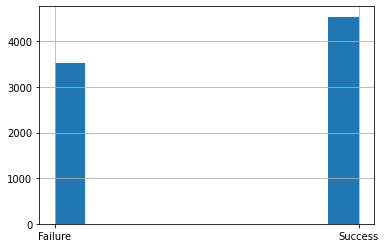

In [279]:
main_df["label"].hist()

In [280]:
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,1750000,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,2535000,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,1250000,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,35000000,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,719000,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,5000000,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,500000,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,1750000,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,21300000,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


In [281]:
main_df['funding_total_usd'].describe()

count         8064
mean      24872221
std       94941360
min           1000
25%        2000000
50%        8096500
75%       25000000
max     5700000000
Name: funding_total_usd, dtype: float64

# Clean Merged Data
- Remove outliers
- Adjust skewness

In [282]:
y = main_df[["funding_total_usd"]]

## Removing Skewness

In [283]:
y.skew()

funding_total_usd   34
dtype: float64

In [284]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
transformed_data = stats.boxcox(main_df['funding_total_usd'])[0]
boxcox_param = stats.boxcox(main_df['funding_total_usd'])[1]
y = pd.Series(transformed_data)
y.skew()

-0.002339944830612883

In [285]:
boxcox_param

0.12419015410855264

In [286]:
main_df["funding_total_usd"] = y
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,40,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,38,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,62,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,35,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,NaN,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,NaN,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,NaN,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,NaN,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


## Removing Outliers

In [287]:
from pandas.api.types import is_string_dtype
def num_outliers(df):
		for col in df.columns:
				if is_string_dtype(df[col]) == True:
						continue
				else:
				    q1 = df[col].describe()["25%"]
				    q3 = df[col].describe()["75%"]
				    iqr = q3 - q1
				    outliers = 0
				    for x in df[col]:
				        if x > (q3 + (1.5 * iqr)) or x < (q1 - (1.5*iqr)):
				            outliers += 1
				    print(df[col].name + " has " + str(outliers) + " outliers")

In [288]:
num_outliers(main_df[["funding_total_usd"]])

funding_total_usd has 35 outliers


In [289]:
Q1 = main_df[["funding_total_usd"]].quantile(0.25)
Q3 = main_df[["funding_total_usd"]].quantile(0.75)
IQR = Q3 - Q1

adjusted_df = main_df[["funding_total_usd"]][~((main_df[["funding_total_usd"]]< (Q1 - 1.5 * IQR)) |(main_df[["funding_total_usd"]]> (Q3 + 1.5 * IQR))).any(axis=1)]

In [290]:
main_df["funding_total_usd"] = adjusted_df
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,40,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,38,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,62,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,35,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,y prime,PA,Malvern,2006-01-01,2013-09-07,2013-09-07,1,NaN,health,operating,...,0,0,0,0,0,0,1,92,92,Failure
8065,yaM Labs,VA,Alexandria,2009-12-03,2011-03-02,2011-03-02,1,NaN,software,operating,...,0,0,0,0,0,0,0,15,15,Failure
8066,ybuy,CA,Beverly Hills,2011-08-01,2012-01-17,2012-07-05,2,NaN,web,operating,...,0,0,0,0,0,0,0,5,11,Failure
8067,zozi,CA,San Francisco,2007-01-01,2008-08-01,2013-04-04,4,NaN,ecommerce,operating,...,0,0,0,1,0,0,0,19,75,Success


In [291]:
# Visually inspecting outliers
main_df.loc[main_df["funding_total_usd"].isnull() == True, :]

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
54,A123 Systems,MA,Watertown,2001-01-01,2005-11-01,2012-06-07,8,NaN,nanotech,ipo,...,0,0,0,0,0,0,1,58,137,Success
74,AOL,NY,New York,1985-05-24,2005-12-01,2005-12-01,1,NaN,web,ipo,...,0,0,0,0,0,0,0,247,247,Success
92,Abound Solar,CO,Loveland,2007-01-01,2010-07-06,2010-12-15,2,NaN,cleantech,closed,...,0,0,0,0,0,0,1,42,47,Failure
779,Better Place,CA,Palo Alto,2007-10-29,2007-01-01,2012-11-02,6,NaN,cleantech,acquired,...,0,0,0,0,0,0,1,9,61,Success
896,Bloom Energy,CA,Sunnyvale,2002-01-01,2008-01-01,2013-05-10,4,NaN,cleantech,operating,...,0,0,0,0,0,0,1,72,136,Success
1040,BrightSource Energy,CA,Oakland,2004-01-01,2006-11-01,2013-07-25,9,NaN,cleantech,ipo,...,0,0,0,0,0,0,1,34,114,Success
1410,Clearwire,WA,Kirkland,2003-10-01,2008-05-06,2013-02-27,4,NaN,mobile,acquired,...,0,0,0,0,0,0,0,55,112,Success
1842,Datapipe,NJ,Jersey City,1998-01-01,2008-07-08,2013-05-31,3,NaN,network_hosting,operating,...,0,0,0,0,0,0,1,126,184,Success
1866,Deem,AZ,Foster City,2000-01-01,2004-01-01,2013-09-24,8,NaN,ecommerce,operating,...,0,0,0,1,0,0,0,48,164,Success
1882,Demand Media,CA,Santa Monica,2006-06-01,2006-04-01,2013-09-04,6,NaN,news,ipo,...,0,0,0,0,0,0,1,2,87,Success


In [292]:
# Dropping outliers (rows with NaN for funding_total_usd)
main_df.dropna(axis = 0, inplace=True)
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,40,news,operating,...,0,0,0,0,0,0,1,0,0,Failure
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42,web,acquired,...,0,0,0,0,0,0,0,6,7,Success
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,38,analytics,acquired,...,0,0,0,0,0,0,1,2,2,Success
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,62,software,operating,...,0,0,0,0,0,0,0,122,122,Success
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,35,software,operating,...,0,0,0,0,0,0,0,4,21,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,webmynd,CA,San Francisco,2008-01-15,2008-09-01,2010-01-15,3,47,software,operating,...,0,0,0,0,0,0,0,8,24,Failure
8060,weendy,CA,San Francisco,2012-12-01,2013-01-10,2013-01-10,1,33,social,operating,...,0,0,0,0,0,0,1,1,1,Failure
8061,woodpellets.com,NH,Goffstown,2006-01-01,2008-06-03,2009-08-31,2,40,cleantech,operating,...,0,0,0,0,0,0,1,29,43,Success
8062,xAd,NY,New York,2009-01-01,2010-10-13,2012-01-09,3,57,advertising,operating,...,0,1,0,0,0,0,0,21,36,Success


In [293]:
main_df.dtypes

name                               object
state_code                         object
city                               object
founded_at                 datetime64[ns]
first_funding_at           datetime64[ns]
last_funding_at            datetime64[ns]
funding_rounds                      int64
funding_total_usd                 float64
category_code                      object
status                             object
is_software                         int64
is_web                              int64
is_mobile                           int64
is_enterprise                       int64
is_advertising                      int64
is_gamesvideo                       int64
is_ecommerce                        int64
is_biotech                          int64
is_consulting                       int64
is_othercategory                    int64
months_to_first_funding             int64
months_to_last_funding              int64
label                              object
dtype: object

# Further Data Cleaning to Convert/Remove str/dt Columns for Machine Learning

In [294]:
target = ["founded_at", "first_funding_at", "last_funding_at"]
replacement = ["year_founded", "year_first_funding", "year_last_funding"]

for x, y in zip(target, replacement):
    main_df[y] = main_df[x].dt.year
main_df

,name,state_code,city,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,category_code,status,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label,year_founded,year_first_funding,year_last_funding
0,#waywire,NY,New York,2012-06-01,2012-06-30,2012-06-30,1,40,news,operating,...,0,0,0,1,0,0,Failure,2012,2012,2012
1,1000memories,CA,San Francisco,2010-07-01,2010-01-01,2011-02-16,2,42,web,acquired,...,0,0,0,0,6,7,Success,2010,2010,2011
2,100Plus,CA,San Francisco,2011-09-16,2011-11-02,2011-11-30,2,38,analytics,acquired,...,0,0,0,1,2,2,Success,2011,2011,2011
3,1010data,NY,New York,2000-01-01,2010-03-08,2010-03-08,1,62,software,operating,...,0,0,0,0,122,122,Success,2000,2010,2010
4,121nexus,RI,Providence,2011-10-07,2012-02-06,2013-07-01,4,35,software,operating,...,0,0,0,0,4,21,Failure,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,webmynd,CA,San Francisco,2008-01-15,2008-09-01,2010-01-15,3,47,software,operating,...,0,0,0,0,8,24,Failure,2008,2008,2010
8060,weendy,CA,San Francisco,2012-12-01,2013-01-10,2013-01-10,1,33,social,operating,...,0,0,0,1,1,1,Failure,2012,2013,2013
8061,woodpellets.com,NH,Goffstown,2006-01-01,2008-06-03,2009-08-31,2,40,cleantech,operating,...,0,0,0,1,29,43,Success,2006,2008,2009
8062,xAd,NY,New York,2009-01-01,2010-10-13,2012-01-09,3,57,advertising,operating,...,0,0,0,0,21,36,Success,2009,2010,2012


In [295]:
main_df.drop(columns = target, inplace=True)

In [296]:
main_df.columns

Index(['name', 'state_code', 'city', 'funding_rounds', 'funding_total_usd',
       'category_code', 'status', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory',
       'months_to_first_funding', 'months_to_last_funding', 'label',
       'year_founded', 'year_first_funding', 'year_last_funding'],
      dtype='object')

In [297]:
main_df.drop(columns = ["name", "state_code", "city", "category_code", "status"], inplace=True)

In [298]:
main_df

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,label,year_founded,year_first_funding,year_last_funding
0,1,40,0,0,0,0,0,0,0,0,0,1,0,0,Failure,2012,2012,2012
1,2,42,0,1,0,0,0,0,0,0,0,0,6,7,Success,2010,2010,2011
2,2,38,0,0,0,0,0,0,0,0,0,1,2,2,Success,2011,2011,2011
3,1,62,1,0,0,0,0,0,0,0,0,0,122,122,Success,2000,2010,2010
4,4,35,1,0,0,0,0,0,0,0,0,0,4,21,Failure,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,3,47,1,0,0,0,0,0,0,0,0,0,8,24,Failure,2008,2008,2010
8060,1,33,0,0,0,0,0,0,0,0,0,1,1,1,Failure,2012,2013,2013
8061,2,40,0,0,0,0,0,0,0,0,0,1,29,43,Success,2006,2008,2009
8062,3,57,0,0,0,0,1,0,0,0,0,0,21,36,Success,2009,2010,2012


In [299]:
main_df['funding_total_usd'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8059    False
8060    False
8061    False
8062    False
8063    False
Name: funding_total_usd, Length: 8024, dtype: bool>

## Analysing Label

#### Numeric Variables Against Label

In [300]:
rounds = pd.DataFrame(main_df[['year_last_funding','year_first_funding','year_founded','months_to_last_funding',
                               'months_to_first_funding','funding_rounds','funding_total_usd']])

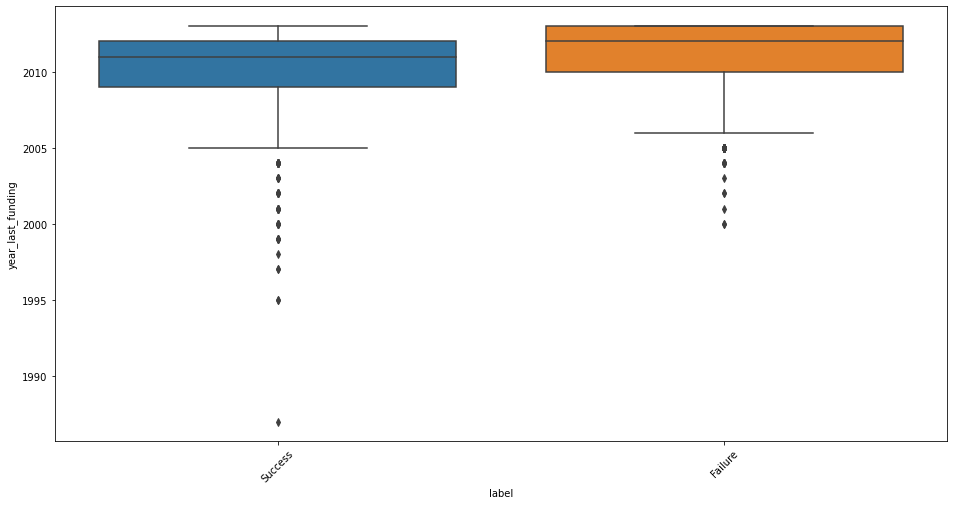

In [301]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'year_last_funding', x = 'label', data = main_df, 
           order = main_df.groupby('label')['year_last_funding'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

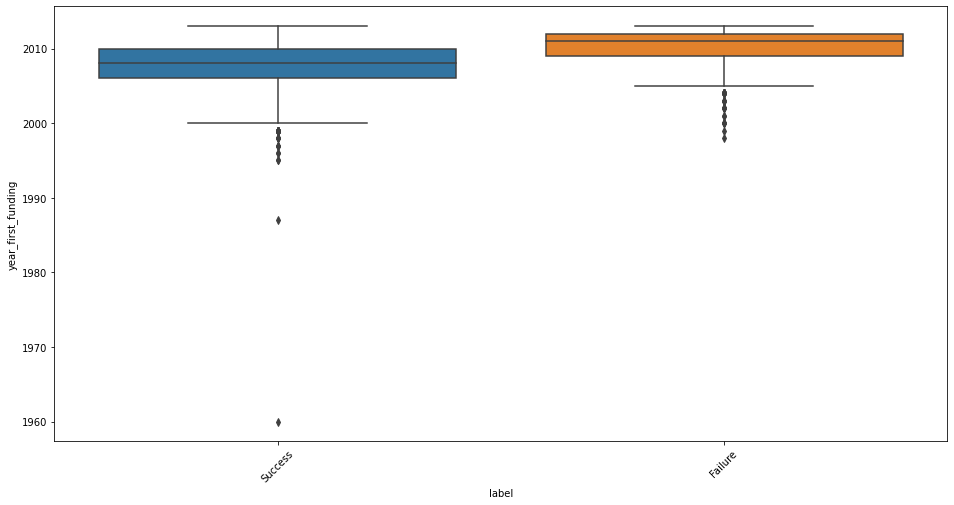

In [302]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'year_first_funding', x = 'label', data = main_df, 
           order = main_df.groupby('label')['year_first_funding'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

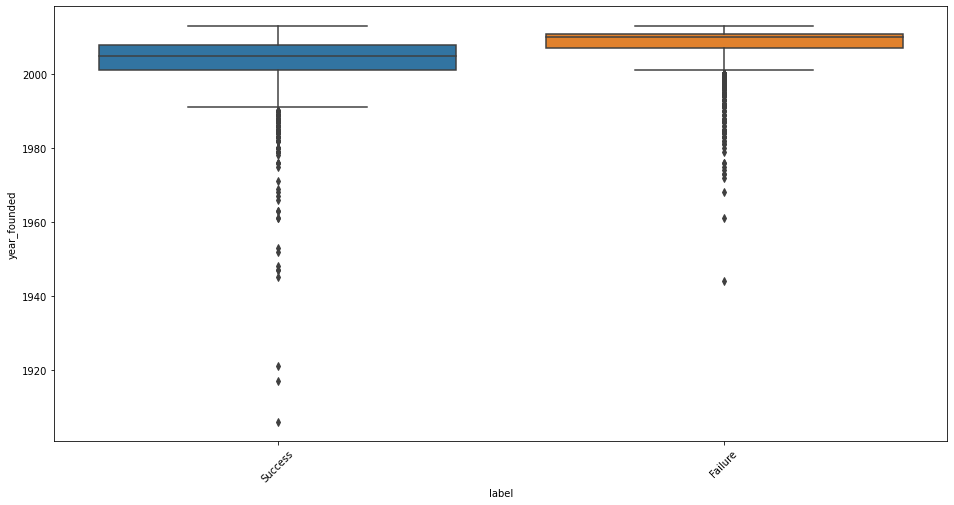

In [303]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'year_founded', x = 'label', data = main_df, 
           order = main_df.groupby('label')['year_founded'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

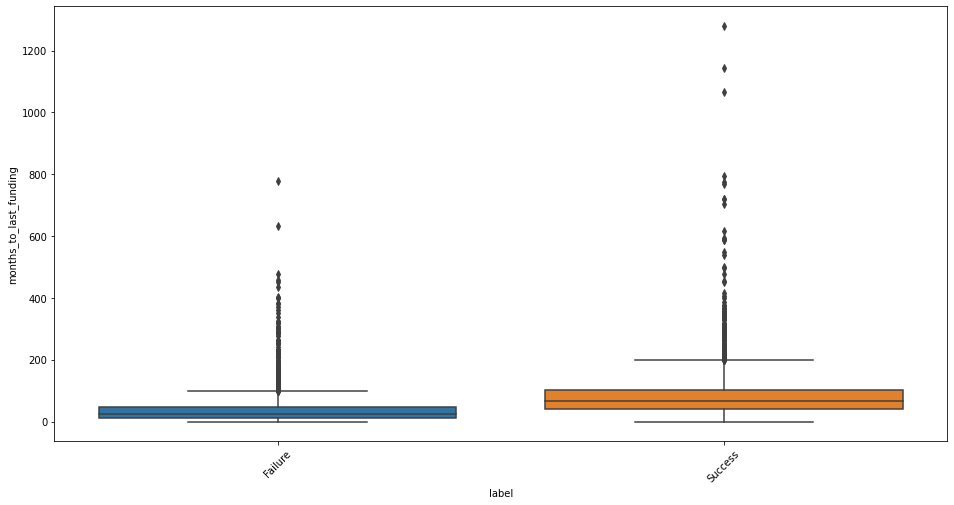

In [304]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'months_to_last_funding', x = 'label', data = main_df, 
           order = main_df.groupby('label')['months_to_last_funding'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

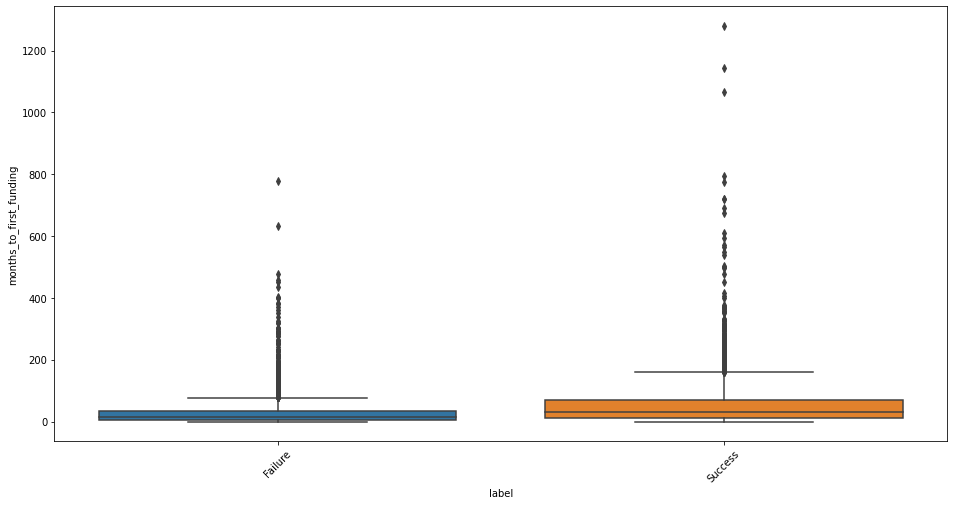

In [305]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'months_to_first_funding', x = 'label', data = main_df, 
           order = main_df.groupby('label')['months_to_first_funding'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

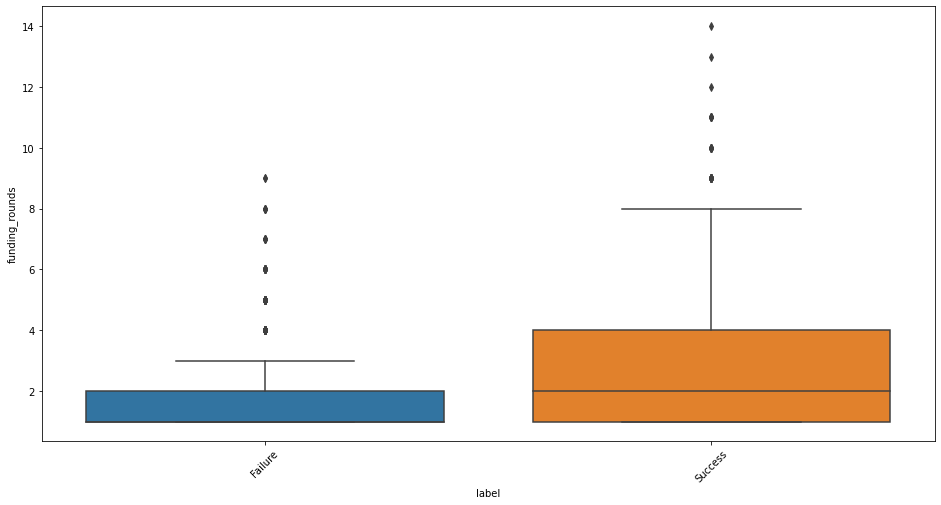

In [306]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'funding_rounds', x = 'label', data = main_df, 
           order = main_df.groupby('label')['funding_rounds'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

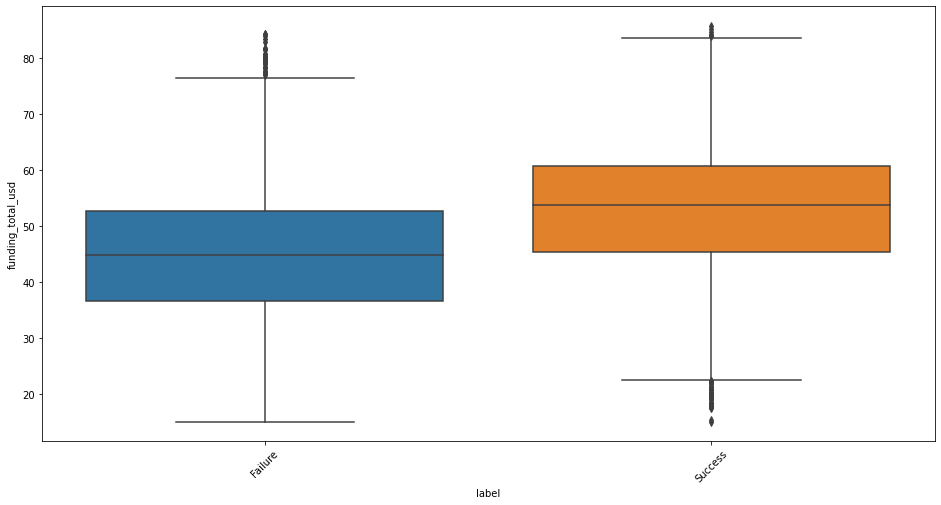

In [307]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sns.boxplot(y = 'funding_total_usd', x = 'label', data = main_df, 
           order = main_df.groupby('label')['funding_total_usd'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

### Categorical Variables Against Label

In [308]:
categorical_variables = main_df.columns.tolist()
categorical_variables

['funding_rounds',
 'funding_total_usd',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'months_to_first_funding',
 'months_to_last_funding',
 'label',
 'year_founded',
 'year_first_funding',
 'year_last_funding']

In [309]:

for column in main_df.columns:
    if 'is_' in column:
        pass
    else:
        categorical_variables.remove(column)
categorical_variables

['is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory']

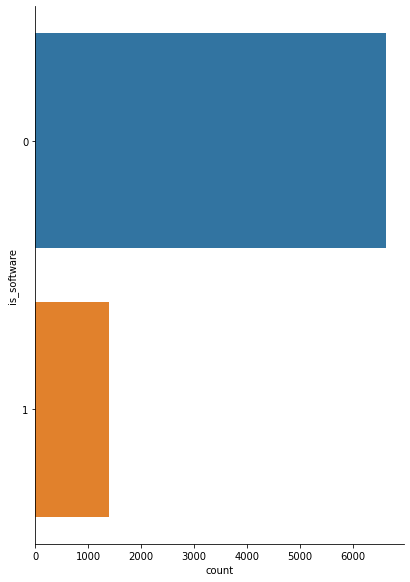

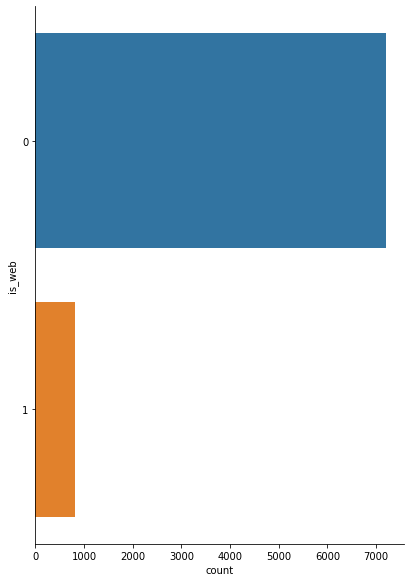

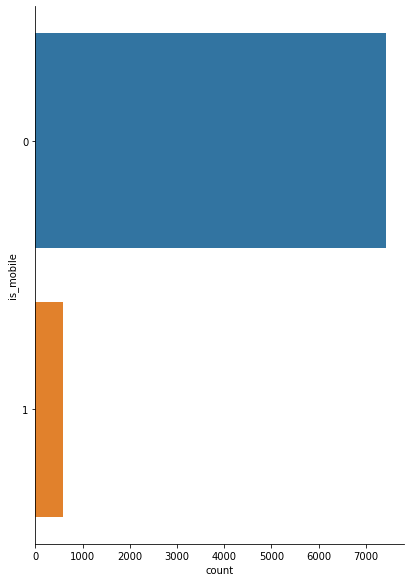

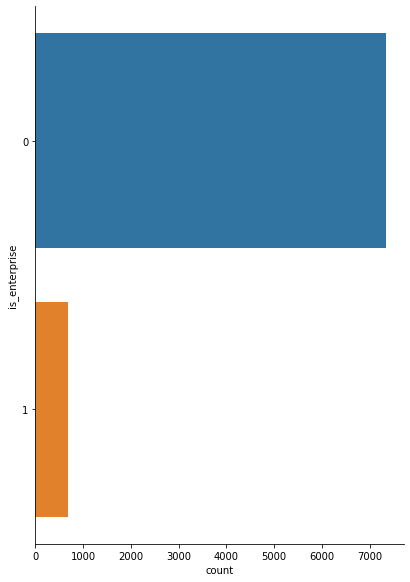

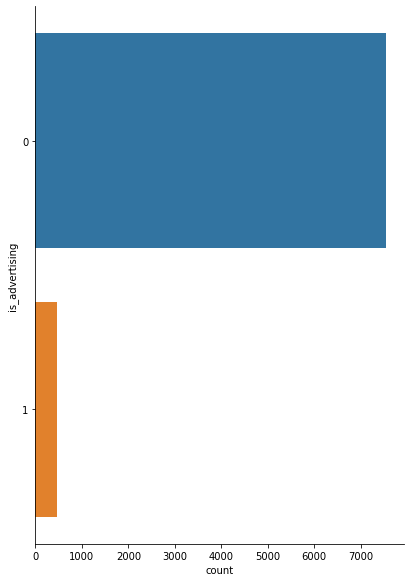

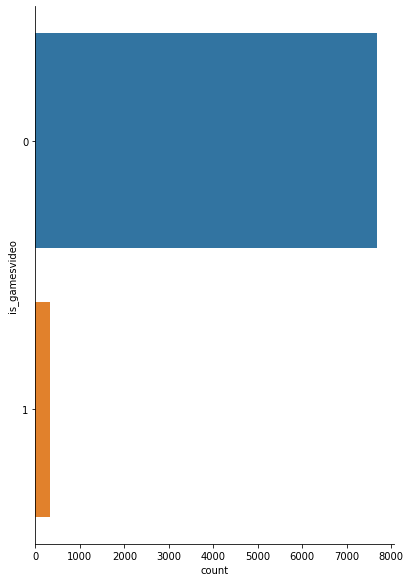

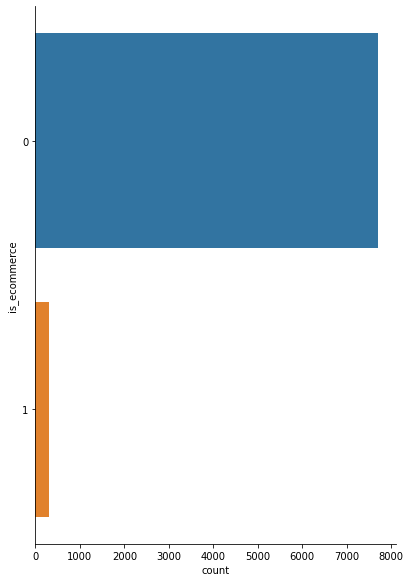

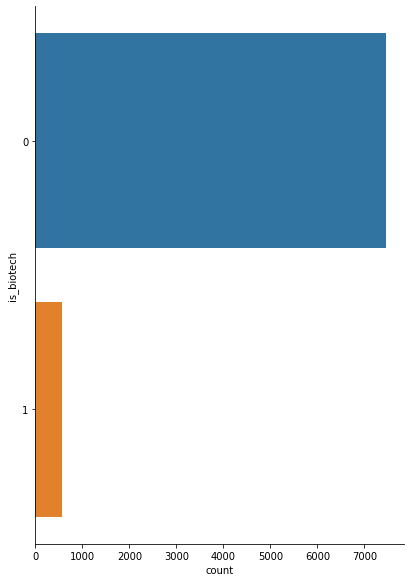

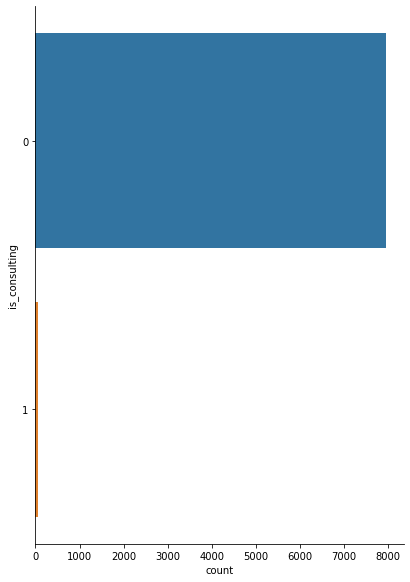

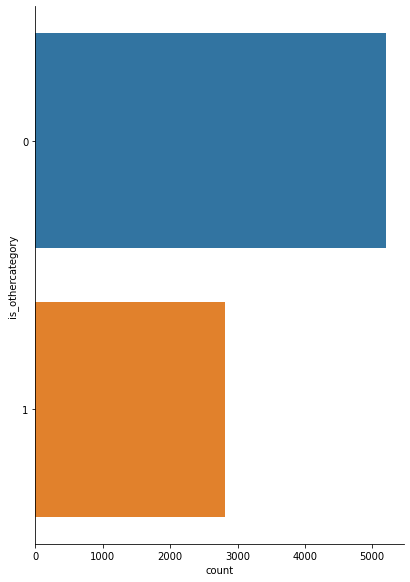

In [310]:
for var in categorical_variables:
    sns.catplot(y = var, data = main_df, kind = "count", height = 8,aspect = 0.7)

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mihikaaga

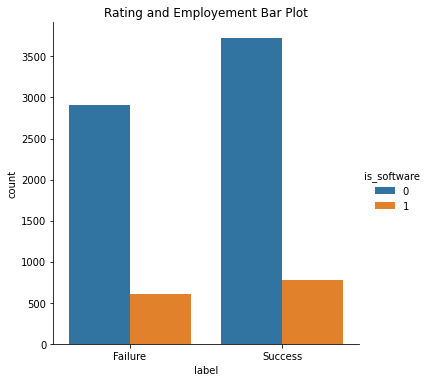

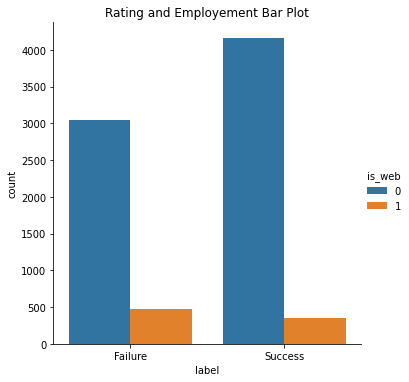

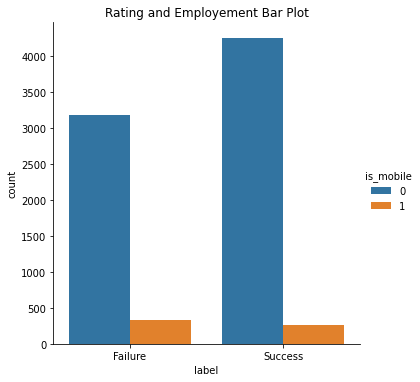

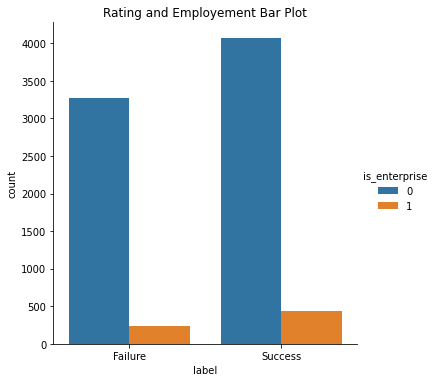

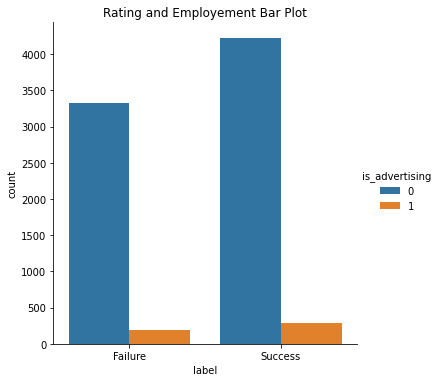

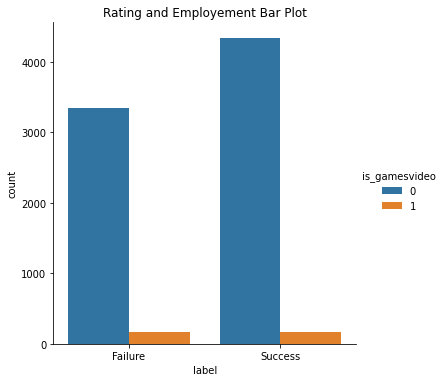

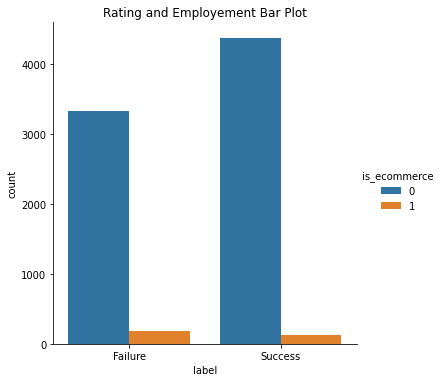

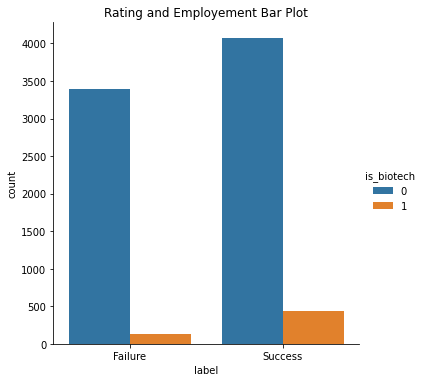

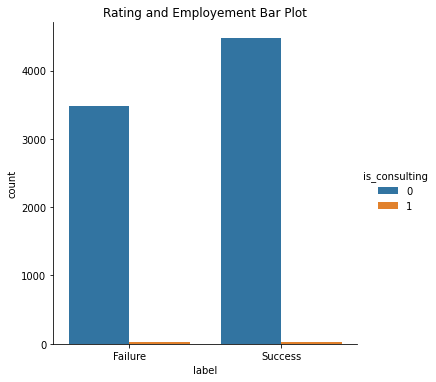

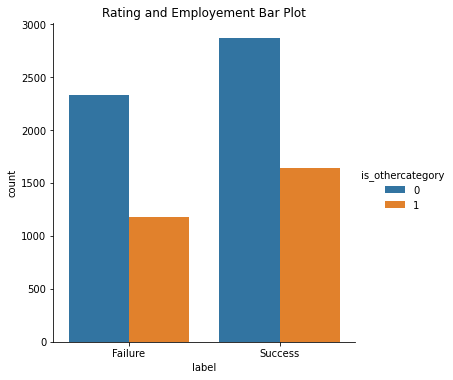

In [311]:
for var in categorical_variables:
    
    # fig, ax = plt.subplots()

    ax = sns.catplot("label", hue=var, data=main_df, kind="count", legend=True)



    plt.title("Rating and Employement Bar Plot")

## Analysing Funding 

#### Numeric Data Against Funding

In [312]:
rounds.head()
print("Data type:", type(rounds))
print("Data dimensions:", rounds.shape)

Data type: <class 'pandas.core.frame.DataFrame'>
Data dimensions: (8024, 7)


                         year_last_funding  year_first_funding  year_founded  \
year_last_funding                        1                   1             0   
year_first_funding                       1                   1             0   
year_founded                             0                   0             1   
months_to_last_funding                  -0                  -0            -1   
months_to_first_funding                 -0                  -0            -1   
funding_rounds                           0                  -0            -0   
funding_total_usd                       -0                  -0            -0   

                         months_to_last_funding  months_to_first_funding  \
year_last_funding                            -0                       -0   
year_first_funding                           -0                       -0   
year_founded                                 -1                       -1   
months_to_last_funding                        1        

<AxesSubplot:>

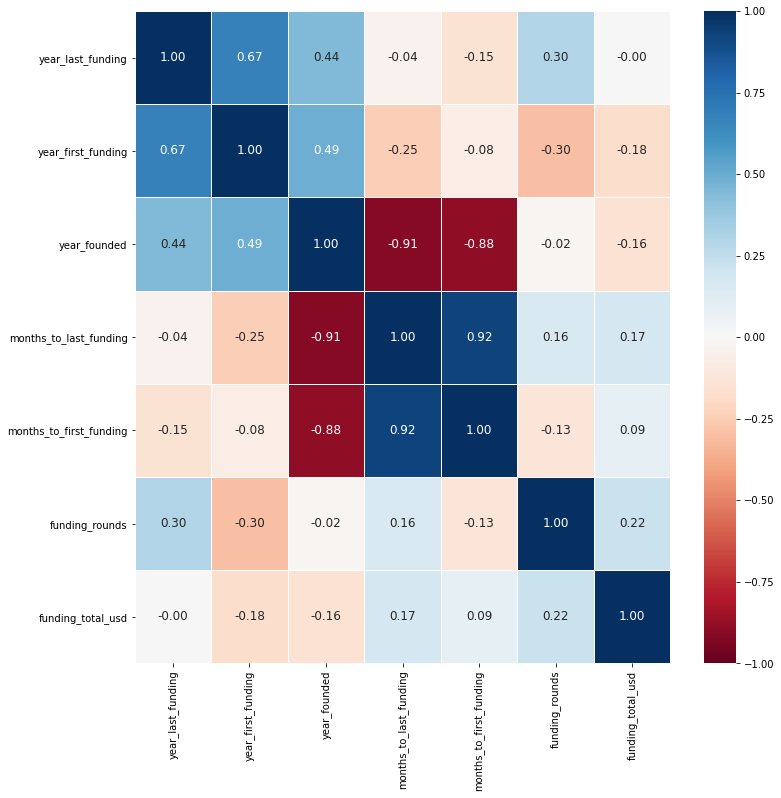

In [313]:
# Correlation Matrix
print(rounds.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sns.heatmap(rounds.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

As seen from the heatmap above, there is a string correlation between months to funding and year founded. This might be explained by the time period after which most startups take on investment from VCs or other investors.

#### Categorical Data Against Funding

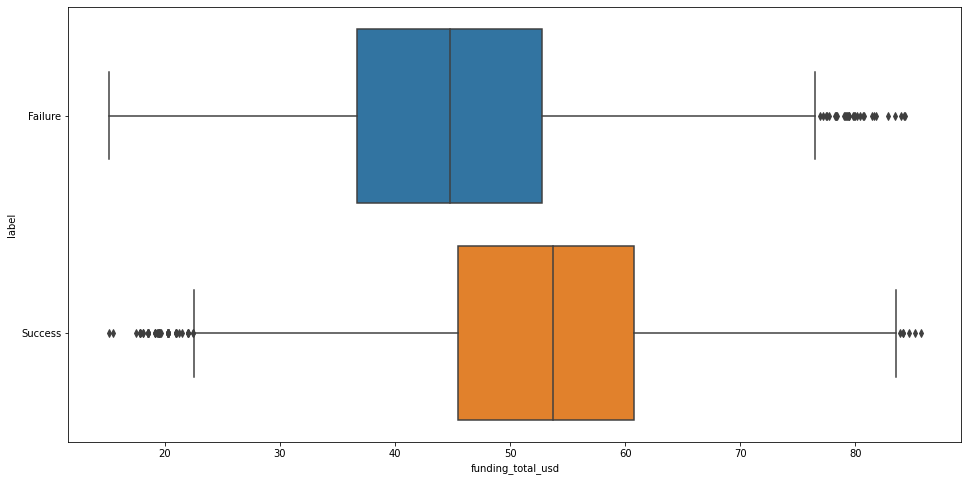

In [314]:
x = pd.DataFrame(main_df[['label']])
y = pd.DataFrame(main_df[['funding_total_usd']])
# start[['funding_total_usd']]
for var in x:
    f = plt.figure(figsize=(16, 8))
    sns.boxplot(x = 'funding_total_usd', y = var, data = main_df)

# Oversampling to Address Imbalanced Classes
- We need to balance the classes to make sure the model isn't biased towards one outcome over another
    - We choose SMOTE oversampling in order to prevent information loss from downsampling.
        - SMOTE uses a point from minority class and computing a K nearest neighbour for this point. The synthetic points are generated and added between the point and its neighbours.

## Check Initial Class Balance

In [315]:
len(main_df.loc[main_df["label"] == "Success"])

4511

In [316]:
len(main_df.loc[main_df["label"] == "Failure"])

3513

In [317]:
X = main_df.loc[:, main_df.columns != "label"]
y = main_df[["label"]]

In [318]:
from imblearn.over_sampling import SMOTE
smoter = SMOTE(random_state = 42)

X_smote, y_smote = smoter.fit_resample(X, y)

In [319]:
X_smote

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,year_founded,year_first_funding,year_last_funding
0,1,40,0,0,0,0,0,0,0,0,0,1,0,0,2012,2012,2012
1,2,42,0,1,0,0,0,0,0,0,0,0,6,7,2010,2010,2011
2,2,38,0,0,0,0,0,0,0,0,0,1,2,2,2011,2011,2011
3,1,62,1,0,0,0,0,0,0,0,0,0,122,122,2000,2010,2010
4,4,35,1,0,0,0,0,0,0,0,0,0,4,21,2011,2012,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9017,1,47,0,0,0,0,0,0,0,0,0,1,5,5,2010,2010,2010
9018,1,48,0,0,0,0,0,0,0,0,0,0,3,3,2012,2012,2012
9019,2,48,0,0,0,0,0,0,0,1,0,0,16,66,2005,2006,2010
9020,2,46,0,0,0,0,0,0,0,0,0,1,14,20,2011,2012,2012


In [320]:
y_smote

,label
0,Failure
1,Success
2,Success
3,Success
4,Failure
...,...
9017,Failure
9018,Failure
9019,Failure
9020,Failure


In [321]:
len(y_smote.loc[y_smote["label"] == "Success"]), len(y_smote.loc[y_smote["label"] == "Failure"])

(4511, 4511)

In [322]:
X_smote['funding_total_usd'].isna().sum()

0

# Model Testing + Feature Importance

## Creating train test split

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

## Cross validating different models
- We use Stratified K folds to shuffle around training and test sets 
    - Model accuracies are compared graphically. Top 3 models are selected for ensembling.

In [324]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier

names = ["KNN",
        "Linear SVM",
         "Random Forest",
         "AdaBoost",
         "Logistic Regression",
         "Extra Trees",
         "Gradient Boosting",
         "Linear Discriminant Analysis"
        ]

kfold = StratifiedKFold(n_splits=5)

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025, random_state = 42),
    RandomForestClassifier(random_state = 42),
    AdaBoostClassifier(random_state = 42),
    LogisticRegression(random_state = 42),
    ExtraTreesClassifier(random_state = 42),
    GradientBoostingClassifier(random_state=42),
    LinearDiscriminantAnalysis()
]
                                  

In [325]:
def cv_scoring(scoring_metric):
    results = []
    for classifier in classifiers:
        results.append(cross_val_score(classifier, X_train, y_train.values.ravel(), scoring = scoring_metric, cv = kfold, n_jobs = -1))
        
    mean_results = []
    std_results = []
    for result in results:
        mean_results.append(result.mean())
        std_results.append(result.std())
    results_df = pd.DataFrame({"Cross Validation Means": mean_results, "Cross Validation Standard Dev": std_results, "Classifier" : names})
    fig = sns.barplot("Cross Validation Means", "Classifier", data = results_df)
    fig.set_xlabel("Mean " + scoring_metric)
    fig.set_title("Cross Validation Scores For Each Classifier")
    fig
    

    

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



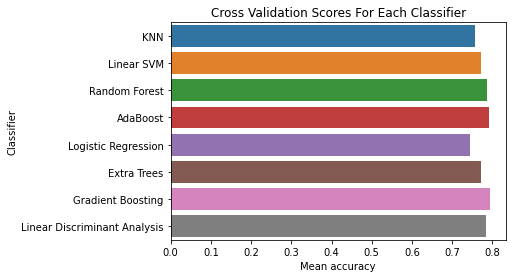

In [326]:
cv_scoring("accuracy")    

/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



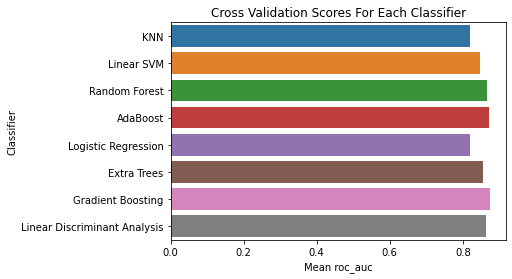

In [328]:
cv_scoring("roc_auc")

## Models Identified for Ensembling:
1. Gradient Boosting Classifier
2. AdaBoost
3. Random Forest

## Randomized Search for Best Hyperparameters
- We opt for Randomized Search because Grid Searching is brute force - too computationally intensive
    - Randomized Search uniformly samples from given hyperparameters to determine the combination of hyperparameters that yields the highest accuracy

In [329]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Gradient Boosting Classifier

In [330]:
from sklearn.model_selection import RandomizedSearchCV
GB_check = GradientBoostingClassifier(random_state=42)
gb_param_dist = {"n_estimators": [100, 200, 500, 800, 1000],
                "learning_rate": [0.001, 0.1, 0.05, 0.1, 1, 10],
                "max_depth": [x for x in range(10)],
                "max_features": [0.1, 0.5, 1]}

RS_GB = RandomizedSearchCV(GB_check, param_distributions = gb_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_GB.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.1, 0.05, 0.1,
                                                          1, 10],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [0.1, 0.5, 1],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000]},
                   scoring='accuracy', verbose=1)

In [331]:
RS_GB_best = RS_GB.best_estimator_
RS_GB_best

GradientBoostingClassifier(max_depth=2, max_features=1, n_estimators=1000,
                           random_state=42)

### AdaBoost

In [332]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [333]:
ada_check = AdaBoostClassifier(random_state=42)
ada_param_dist = {"algorithm": ["SAMME", "SAMME.R"],
                 "n_estimators": [1, 2, 3, 4, 5],
                 "learning_rate": [0.001, 0.1, 0.05, 0.1, 1, 10]}

RS_ada = RandomizedSearchCV(ada_check, param_distributions = ada_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_ada.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001, 0.1, 0.05, 0.1,
                                                          1, 10],
                                        'n_estimators': [1, 2, 3, 4, 5]},
                   scoring='accuracy', verbose=1)

In [334]:
RS_ada_best = RS_ada.best_estimator_
RS_ada_best

AdaBoostClassifier(learning_rate=1, n_estimators=3, random_state=42)

### Random Forest

In [335]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [336]:
rf_check = RandomForestClassifier(random_state=42)
rf_param_dist = {"max_depth": [x for x in range(4)],
                  "max_features": [x for x in range(7)],
                  "min_samples_split": [2, 3, 5 , 10],
                  "min_samples_leaf": [x for x in range(10)],
                  "n_estimators": [1, 2, 3, 10, 50]}
                 
RS_rf = RandomizedSearchCV(rf_check, param_distributions = rf_param_dist, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)
RS_rf.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/mihikaagarwal/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.di

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [0, 1, 2, 3],
                                        'max_features': [0, 1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [0, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [1, 2, 3, 10, 50]},
                   scoring='accuracy', verbose=1)

In [337]:
RS_rf_best = RS_rf.best_estimator_
RS_rf_best

RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=10, random_state=42)

## Feature Importance
- We visualize feature importance within each model

In [338]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier


In [339]:
feature_col = X_train.columns.values

features_df = pd.DataFrame({"Features": feature_col,
                            "Gradient Boost Feature Importance": RS_GB_best.feature_importances_,
                             "AdaBoost Feature Importance": RS_ada_best.feature_importances_, 
                            "Random Forest Feature Importance": RS_rf_best.feature_importances_})

In [340]:
features_df.set_index("Features", inplace=True)
features_df

,Gradient Boost Feature Importance,AdaBoost Feature Importance,Random Forest Feature Importance
Features,,,
funding_rounds,0,0,0
funding_total_usd,0,0,0
is_software,0,0,0
is_web,0,0,0
is_mobile,0,0,0
is_enterprise,0,0,0
is_advertising,0,0,0
is_gamesvideo,0,0,0
is_ecommerce,0,0,0


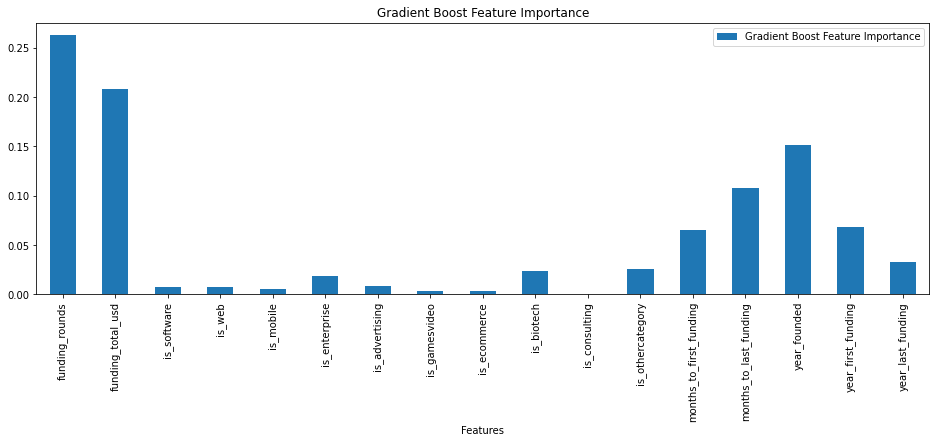

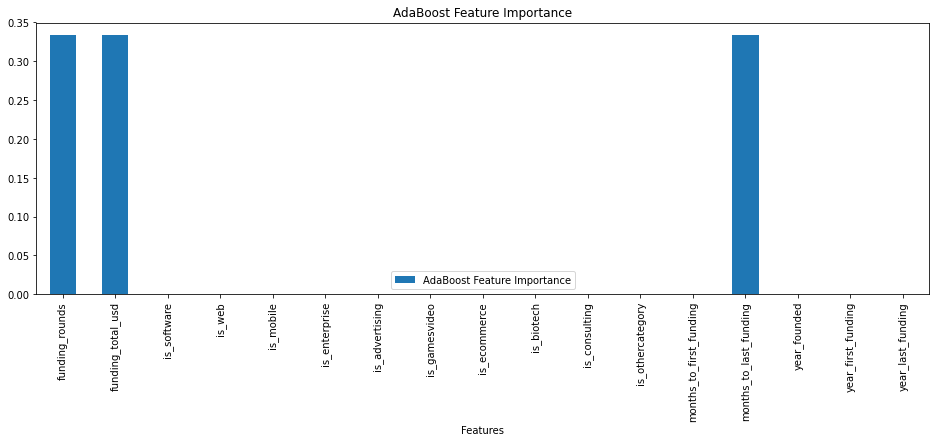

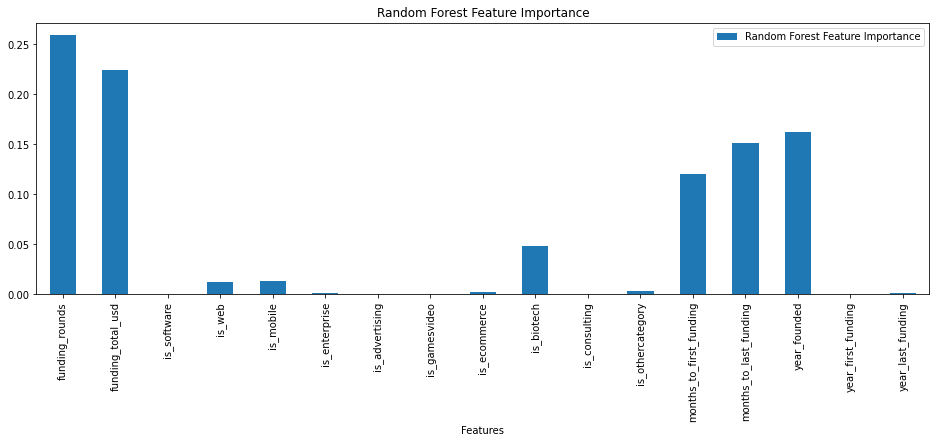

In [341]:
for x in features_df.columns:
    if x == "Features":
        continue
    else:
        
        features_df[[x]].plot(figsize = (16,5), kind = "bar").set_title(x)
        plt.show()

## Testing Individual Model Scores (F1)
- Using F1 scores, we evaluate each model's F1 scores to see if any individual model can beat the ensemble

In [342]:
for x, y in zip([RS_GB_best, RS_ada_best, RS_rf_best], ["Gradient Boost",
                                                       "ADABoost",
                                                       "Random Forest"]):
    pred = x.predict(X_test)
    print(y + " has F1 score = " + str(f1_score(y_test, pred, average = "macro")))

Gradient Boost has F1 score = 0.8059735872235874
ADABoost has F1 score = 0.7609720336465151
Random Forest has F1 score = 0.7567281634978805


## Ensembling

### Voting Classifier

In [343]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [("gb", RS_GB_best),
                                      ("ada", RS_ada_best),
                                      ("rf", RS_rf_best)])

voting = voting.fit(X_train, y_train.values.ravel())

In [344]:
voting_pred = voting.predict(X_test)
voting_pred

array(['Failure', 'Success', 'Failure', ..., 'Success', 'Failure',
       'Failure'], dtype=object)

In [345]:
f1_score(y_test, voting_pred, average = "macro")

0.7666555814211284

### Stacking Classifier

In [346]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators = [("gb", RS_GB_best),
                                      ("ada", RS_ada_best),
                                      ("rf", RS_rf_best)])

stacking = stacking.fit(X_train, y_train.values.ravel())

In [347]:
stacking_pred = stacking.predict(X_test)
stacking_pred

array(['Failure', 'Success', 'Failure', ..., 'Success', 'Failure',
       'Failure'], dtype=object)

In [348]:
stacking.score(X_test, y_test)

0.8055401662049861

### Ensembling with a Stacking Classifier beats the best performing individual model (Gradient Boost) from above

## User Investment

In [349]:
X_test["funding_total_usd"]

4594   47
3145   60
3723   48
5764   46
1631   54
       ..
2088   57
1282   56
4387   54
8140   63
4264   37
Name: funding_total_usd, Length: 1805, dtype: float64

In [377]:
y_predicted=pd.DataFrame(y_predicted)
y_test=pd.DataFrame(y_test)

y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

X_test['funding_total_usd']=main_df['funding_total_usd']
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

X_test['y_predicted']=y_predicted
X_test['y_test']=y_test
X_test.head()

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,year_founded,year_first_funding,year_last_funding,y_predicted,y_test
0,1,40,1,0,0,0,0,0,0,0,0,0,24,24,2004,2006,2006,Failure,Success
1,2,42,1,0,0,0,0,0,0,0,0,0,28,41,2008,2010,2011,Failure,Failure
2,1,38,0,1,0,0,0,0,0,0,0,0,42,42,2005,2008,2008,Failure,Failure
3,4,62,0,0,0,0,0,0,0,0,0,1,0,35,2009,2009,2012,Success,Success
4,1,35,1,0,0,0,0,0,0,0,0,0,54,54,2004,2008,2008,Failure,Success


In [378]:
#Total Failed startups in dataset
y_test[y_test['label']=='Failure'].count()

label    876
dtype: int64

In [391]:
#Total Succeeded startups in dataset
y_test[y_test['label']=='Success'].count()

label    929
dtype: int64

In [392]:
#Number of startups that have truly failed
X_test[(X_test['y_test']=='Failure')&(X_test['y_predicted']=='Failure')]['y_predicted'].count()

657

In [393]:
#Number of startups that truly succeeded
X_test[(X_test['y_test']=='Success')&(X_test['y_predicted']=='Success')]['y_predicted'].count()

727

Inverting the boxcox transformation so that we can get the actual values of funding_total_usd for investment

In [384]:
# Inverting boxcox transformation
from scipy.special import inv_boxcox

X_test2 = X_test.copy()
inv=inv_boxcox(X_test2["funding_total_usd"], boxcox_param)
X_test2['funding_total_usd']=inv

In [385]:
X_test2.head()

,funding_rounds,funding_total_usd,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,months_to_first_funding,months_to_last_funding,year_founded,year_first_funding,year_last_funding,y_predicted,y_test
0,1,1750000,1,0,0,0,0,0,0,0,0,0,24,24,2004,2006,2006,Failure,Success
1,2,2535000,1,0,0,0,0,0,0,0,0,0,28,41,2008,2010,2011,Failure,Failure
2,1,1250000,0,1,0,0,0,0,0,0,0,0,42,42,2005,2008,2008,Failure,Failure
3,4,35000000,0,0,0,0,0,0,0,0,0,1,0,35,2009,2009,2012,Success,Success
4,1,719000,1,0,0,0,0,0,0,0,0,0,54,54,2004,2008,2008,Failure,Success


## If an investor invests into all startups, without using our model, it would cost him USD41.9 billion

In [386]:
X_test2['funding_total_usd'].sum()

41932429313.0

## If an investors uses our model and invests in startups, it would cost him USD22 billion

In [387]:
X_test2[(X_test2['y_predicted']=='Success')]['funding_total_usd'].sum()

22254747102.0

## Thus, 

In [388]:
X_test2[(X_test2['y_test']=='Failure')&(X_test2['y_predicted']=='Success')]['funding_total_usd'].sum()

4810211407.0

## The potential of loss with our model is USD4.8 billion as seen above, but the potential of saving in terms of investment for an investor is USD15 billion as seen below

In [395]:
X_test2[(X_test2['y_test']=='Failure')&(X_test2['y_predicted']=='Failure')]['funding_total_usd'].sum()

15162582429.0

In [390]:
df = pd.DataFrame(columns = X_test.columns)
row = {}
funding_rounds = int(input("No of funding rounds:"))
row['funding_rounds']= funding_rounds
funding_total_usd = int(input("Funding in usd:"))
row['funding_total_usd']= funding_total_usd
category = input("Type of company:").lower()
for column in X_test.columns:
    flag = 0
    if "is_" in column:
        if category in column:
            flag =1
            row[column]=1
        else:
            row[column]=0
if flag == 0:
    df["is_othercategory"]=1
months_to_last_funding = int(input("Number of months to last funding:"))
months_to_first_funding = int(input("Number of months to first funding:"))
year_founded = int(input("Year that the startup was founded in:"))
year_first_funding = int(input("Year of first funding:"))
year_last_funding = int(input("Year of last funding:"))

row['months_to_last_funding'] = months_to_last_funding
row['months_to_first_funding'] = months_to_first_funding
row['year_founded'] = year_founded
row['year_first_funding'] = year_first_funding
row['year_last_funding'] = year_last_funding

df = df.append(row, ignore_index=True)
df

No of funding rounds:


ValueError: invalid literal for int() with base 10: ''

In [ ]:
stacking_pred = stacking.predict(df)
print(stacking_pred)